# Bivariate Dat Exploration / Analysis

In [37]:
# Imports
from pathlib import Path
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loading import demographics, weather, rats, geography, ml

data_folder_path = "C:/Users/jerom/OneDrive/Documents/Uni/MGI/RS and GIS integration/ACT Python Environment/local_data/"

rat_df = rats.load_rm_data(data_folder_path + "Rat_Monitor_export.xlsx")
pc_rat_df = rats.group_by_postcode(rat_df)
month_rat_df = rats.group_by_month(rat_df)

cbs_df = demographics.load_cbs_data(data_folder_path + "cbs_pc4_2024_v1.gpkg")
greenery_df = geography.load_green_data(data_folder_path + "PC4_GreeneryPercentages.csv")
water_df = geography.load_water_data(data_folder_path + "PC4_areas_bak_put_water.csv")
manholes_df = geography.load_manhole_data(data_folder_path + "PC4_areas_bak_put_water.csv")
bins_df = geography.load_bin_data(data_folder_path + "PC4_areas_bak_put_water.csv")

month_temp_df = weather.load_cnt_data(data_folder_path + "cnt.dat")

cbs_df.index = cbs_df.index.astype(int)

variables_df = cbs_df.join(
    greenery_df, on='postcode').join(
        water_df, on='postcode').join(
            manholes_df, on='postcode').join(
                bins_df, on='postcode')

c:\Users\jerom\OneDrive\Documents\Uni\MGI\RS and GIS integration\ACT Python Environment\act2025webapp\data_exploration\data_loading\weather.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cnt_df = pd.read_csv(path, delim_whitespace=True, skiprows=8, names=col_names)


## Analyzing Correlations with Variables

#### Columns of interest

In [77]:
# Inspect columns
variables_df.dropna(axis=1, thresh=0.9*len(variables_df)).columns

Index(['aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder',
       'percentage_geb_nederland_herkomst_nederland',
       'aantal_part_huishoudens', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_tweeouderhuishoudens', 'gemiddelde_huishoudensgrootte',
       'aantal_woningen', 'percentage_koopwoningen', 'percentage_huurwoningen',
       'aantal_personen_met_uitkering_onder_aowlft',
       'omgevingsadressendichtheid', 'stedelijkheid', 'geometry', 'area_km2',
       'inwoner_dichtheid', 'bouwjaar_gemiddeld', 'green_percentage',
       'water_availability', 'manholes_per_km2', 'bins_per_km2'],
      dtype='object')

In [59]:
# Prepare columns of interest
cols_of_interest = [
    'aantal_inwoners',
    'area_km2',
    'inwoner_dichtheid',
    'bouwjaar_gemiddeld',
    'percentage_huurwoningen',
    'aantal_personen_met_uitkering_onder_aowlft',
    'percentage_geb_nederland_herkomst_nederland',
    'percentage_geb_buiten_nederland_herkmst_buiten_europa',
    'stedelijkheid',
    'green_percentage',
    'water_availability',
    'manholes_per_km2',
    'bins_per_km2'
]

#### Total rat sightings

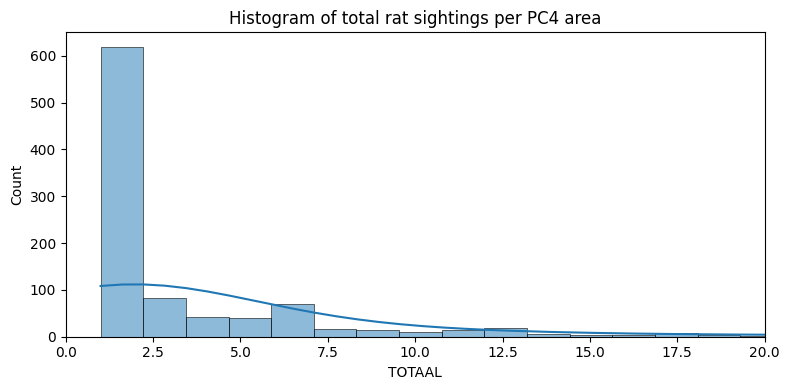

In [44]:
# Plot histogram of the Rat Sightings
plt.figure(figsize=(8, 4))
sns.histplot(pc_rat_df['TOTAAL'], bins=100, kde=True)
plt.title('Histogram of total rat sightings per PC4 area')
plt.ylabel('Count')
plt.xlim(left=0, right=20)
plt.tight_layout()
plt.show()

### Scatterplots

Investigating correlation between rat sightings and aantal_inwoners

Spearman's Rho: 0.08992111058906192


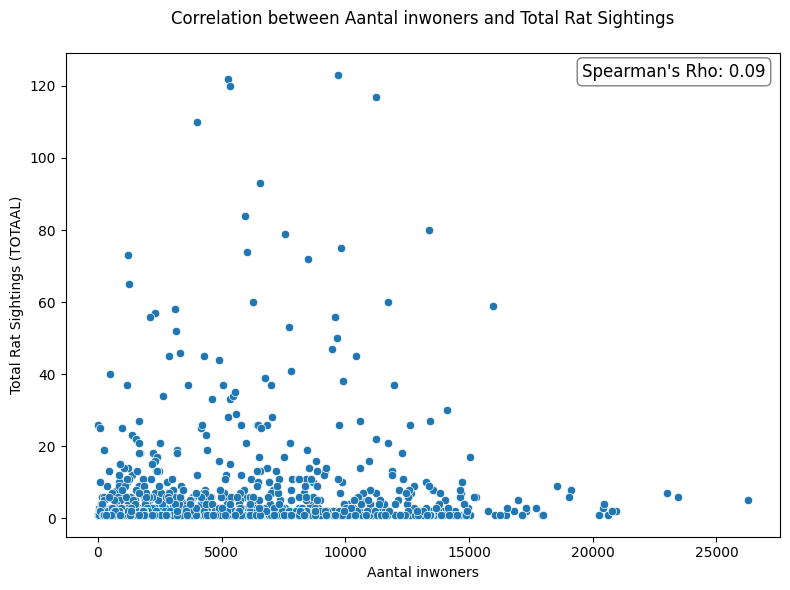

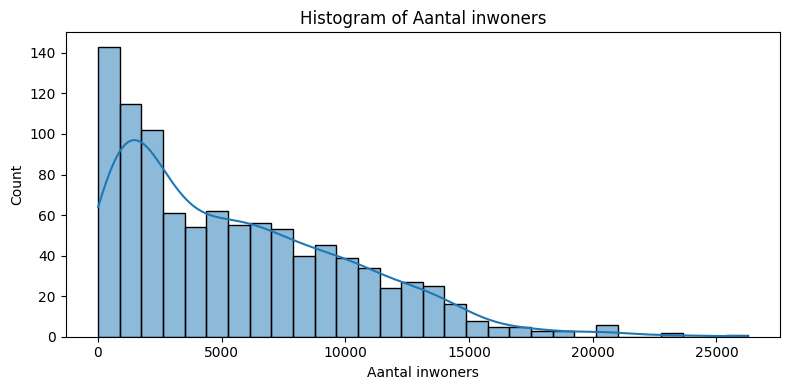

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


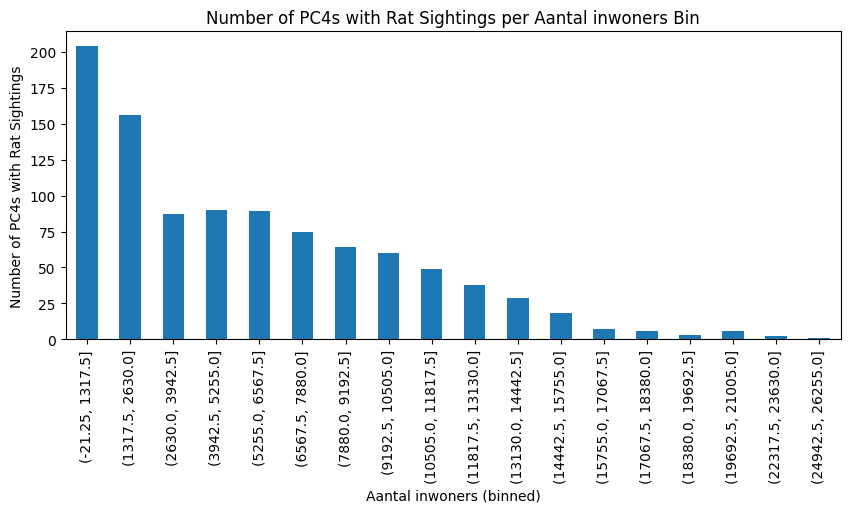

Investigating correlation between rat sightings and area_km2

Spearman's Rho: 0.06070432173037367


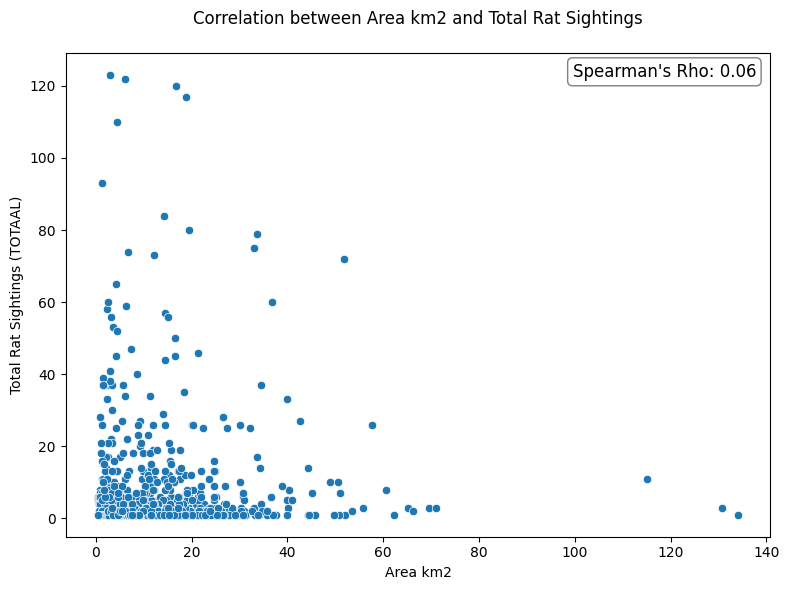

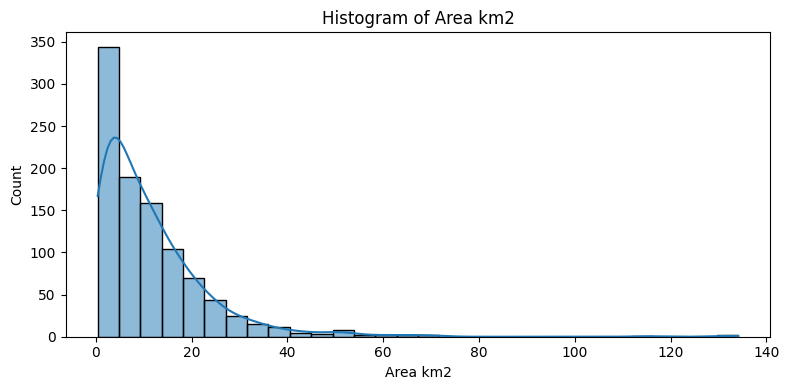

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


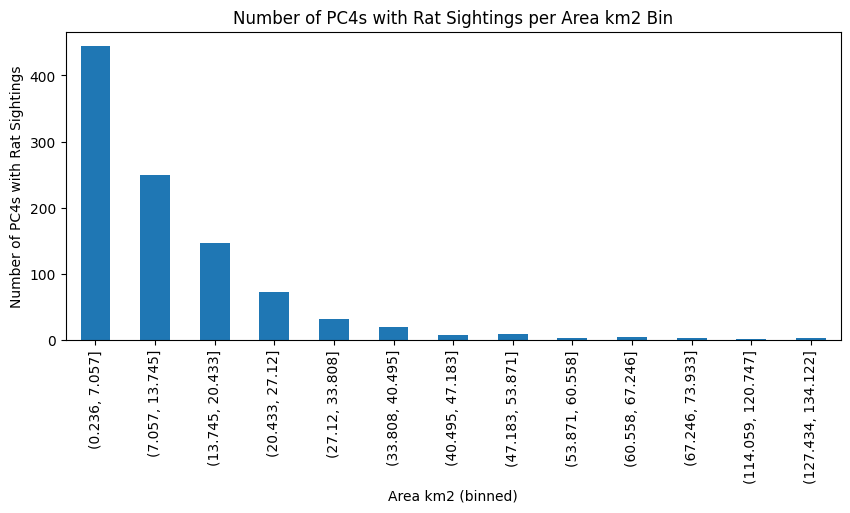

Investigating correlation between rat sightings and inwoner_dichtheid

Spearman's Rho: 0.055710613096926126


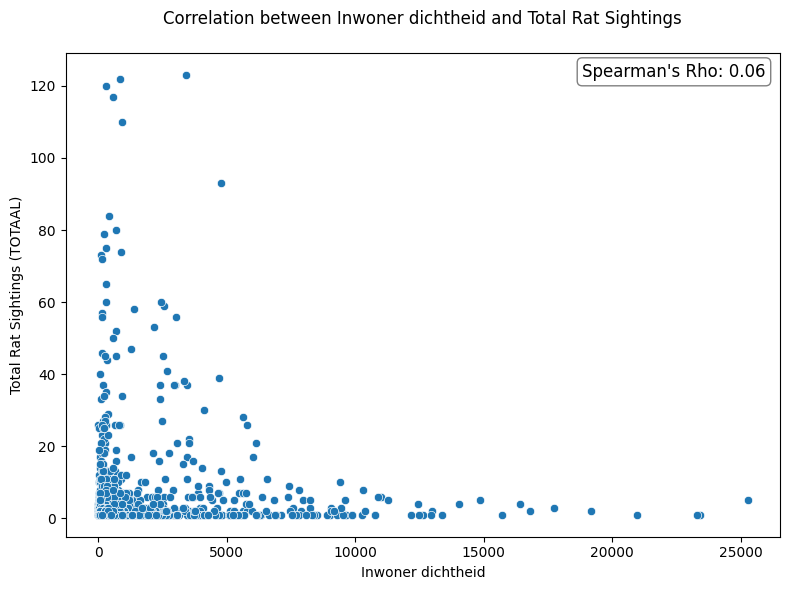

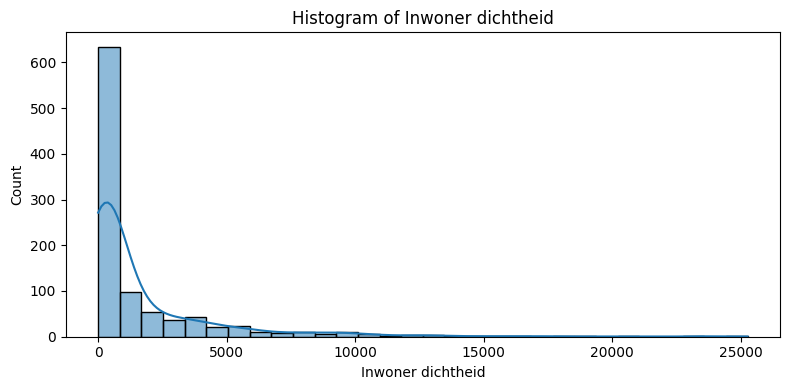

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


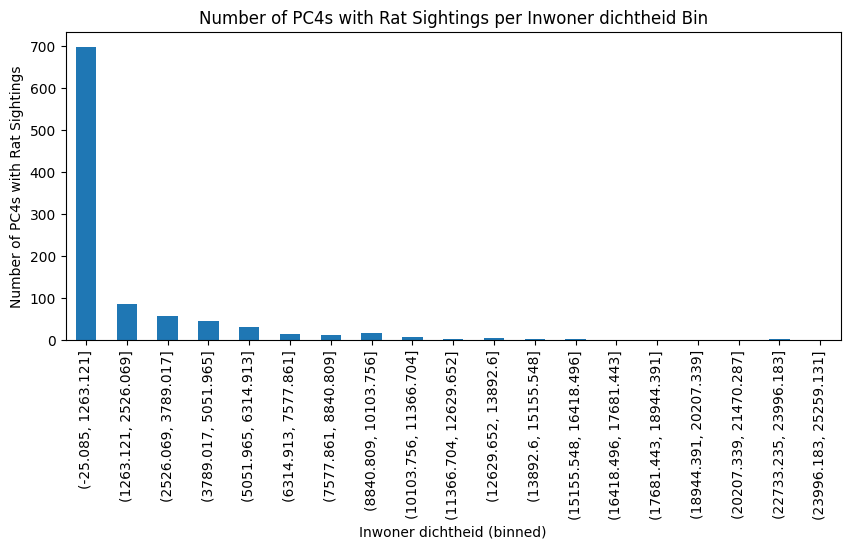

Investigating correlation between rat sightings and bouwjaar_gemiddeld

Spearman's Rho: 0.09214919659579149


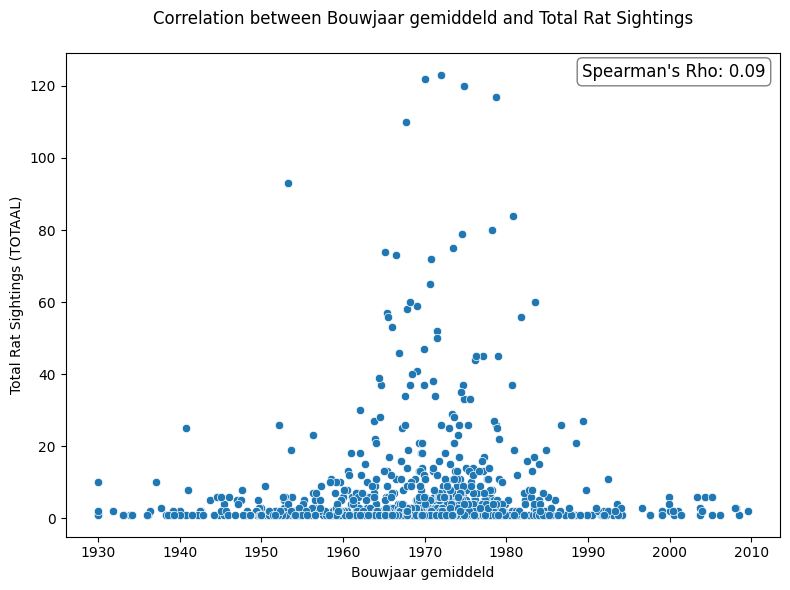

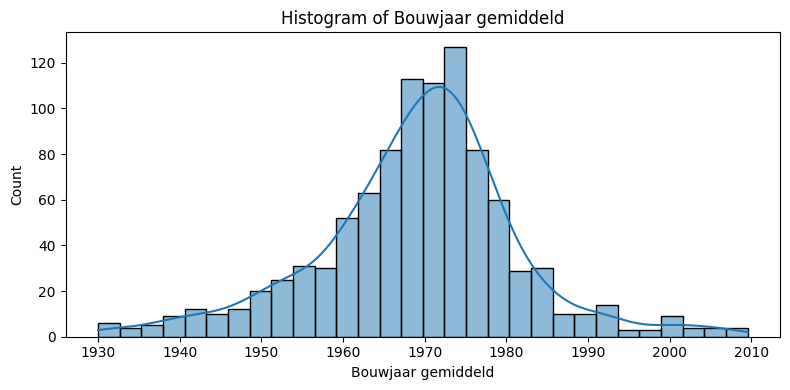

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


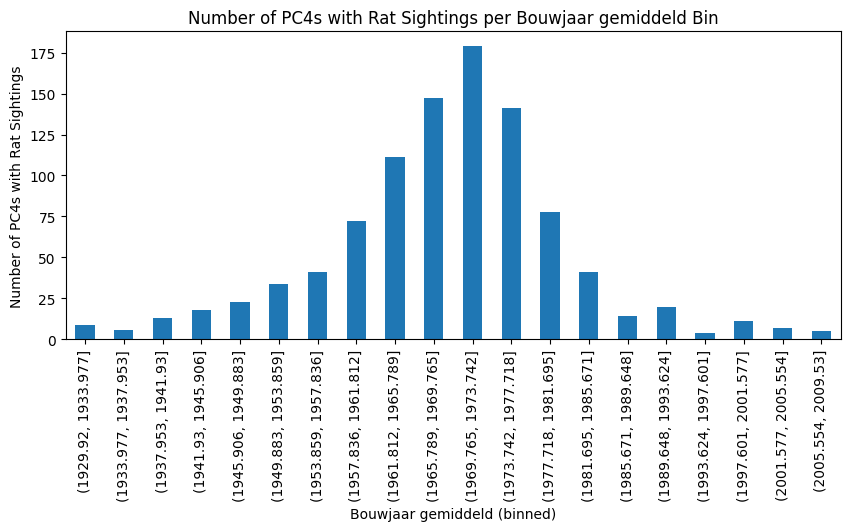

Investigating correlation between rat sightings and percentage_huurwoningen

Spearman's Rho: 0.014849696701564984


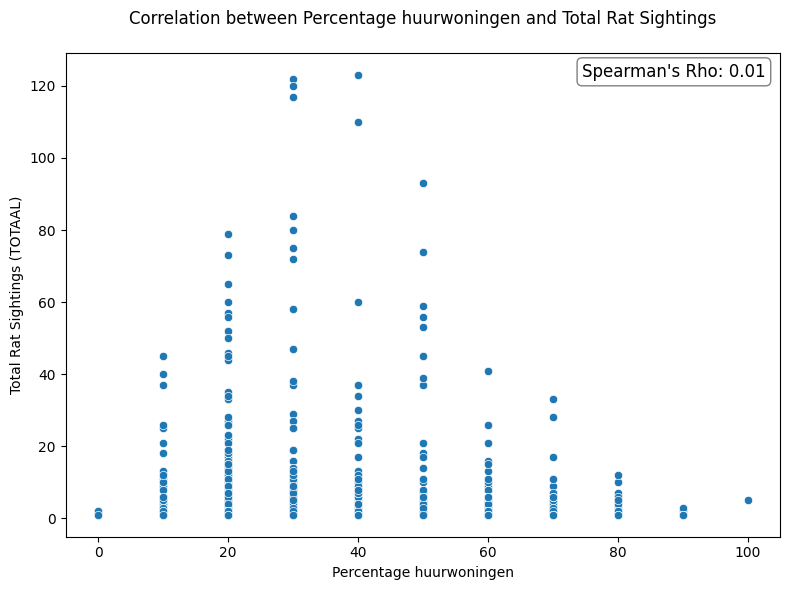

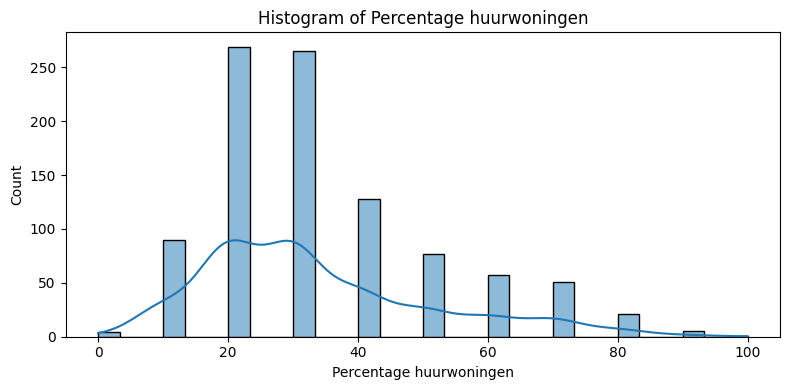

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


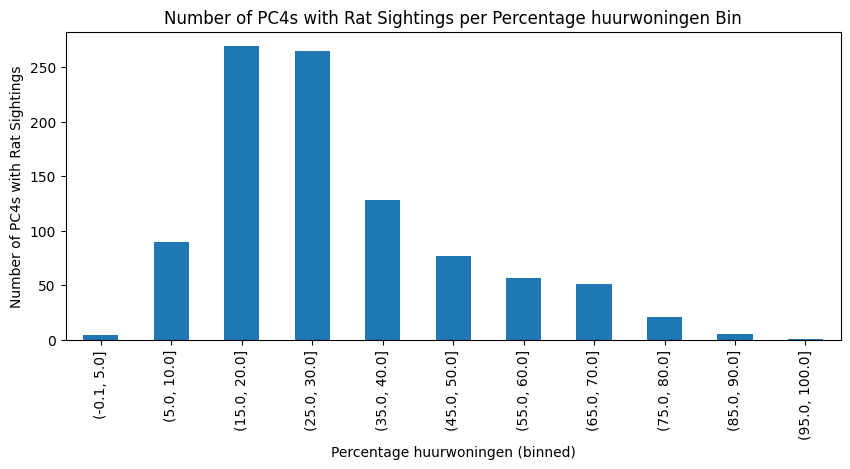

Investigating correlation between rat sightings and aantal_personen_met_uitkering_onder_aowlft

Spearman's Rho: 0.09775276635404521


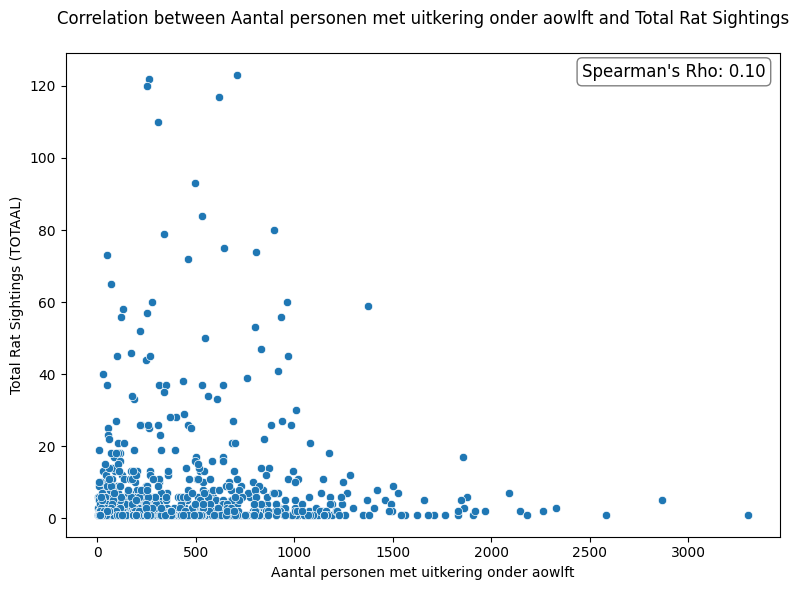

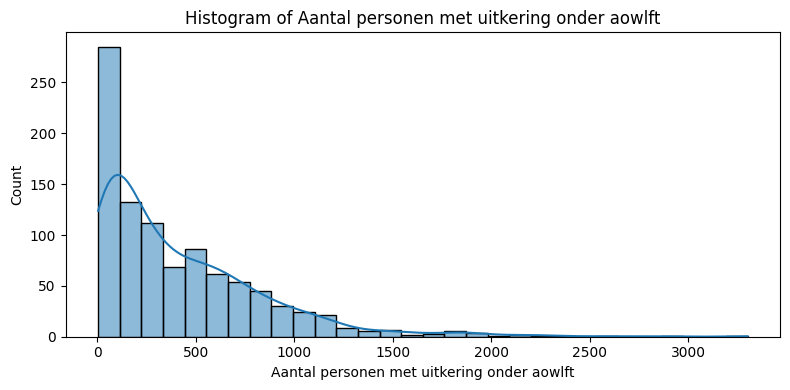

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


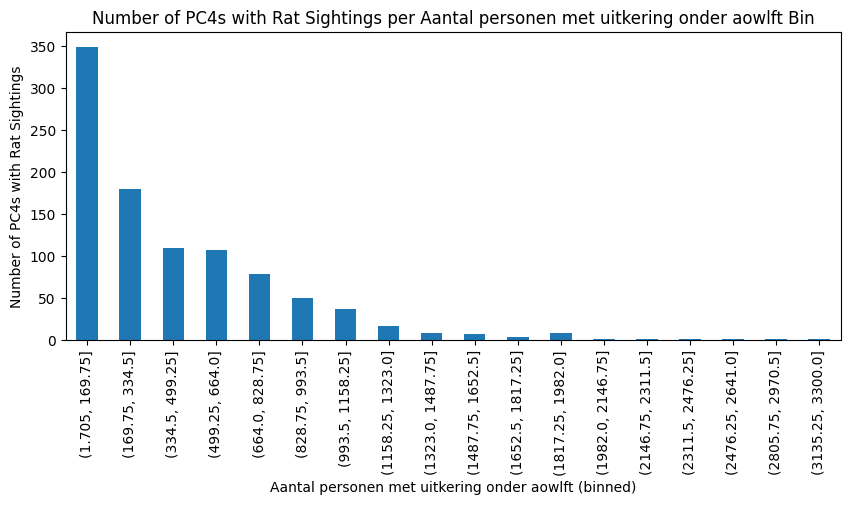

Investigating correlation between rat sightings and percentage_geb_nederland_herkomst_nederland

Spearman's Rho: -0.13001445761802707


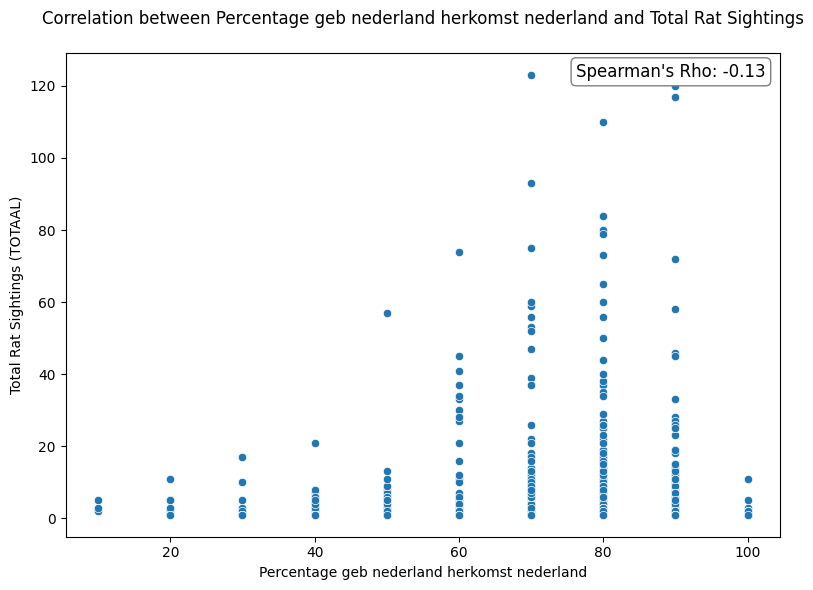

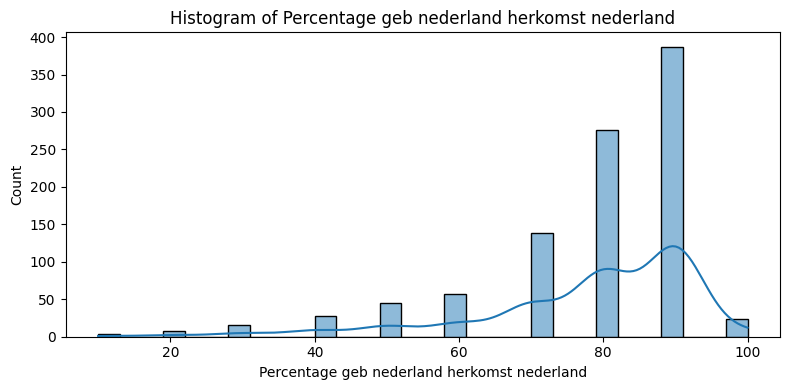

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


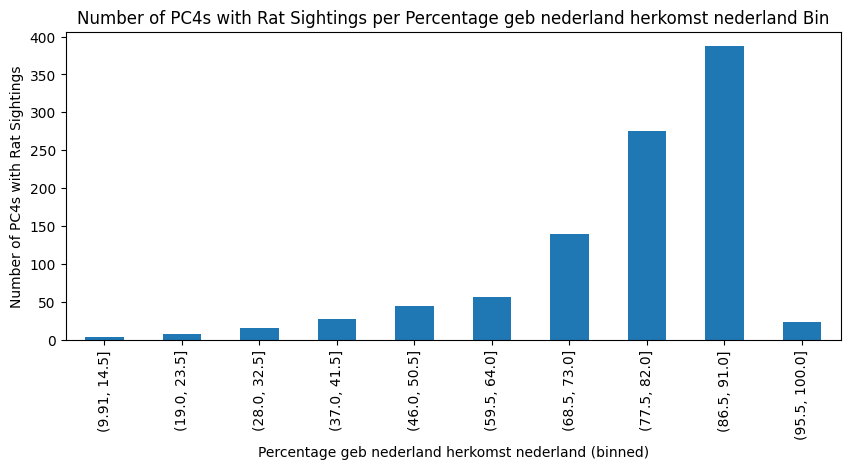

Investigating correlation between rat sightings and percentage_geb_buiten_nederland_herkmst_buiten_europa

Spearman's Rho: -0.012115018834885064


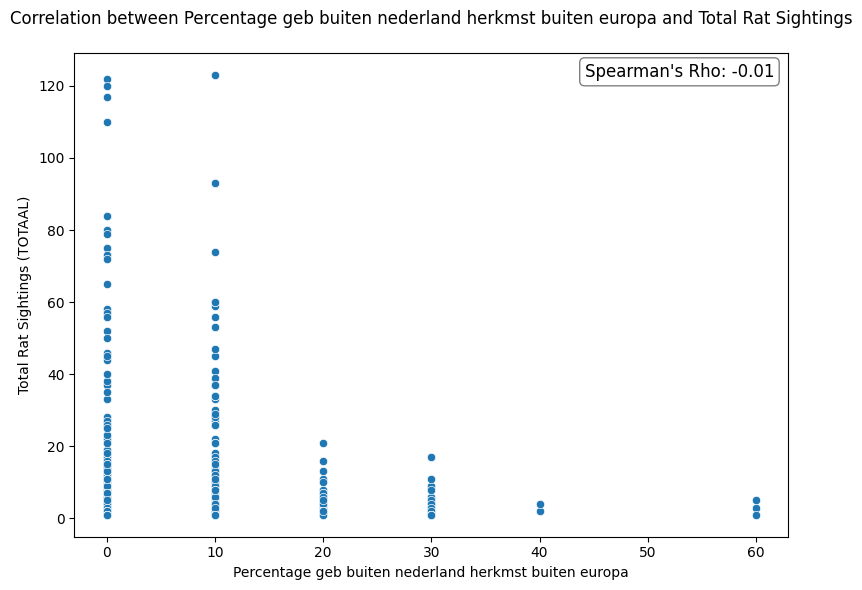

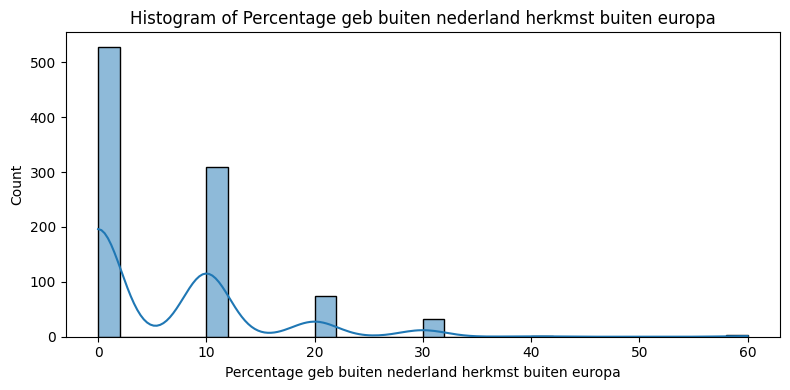

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


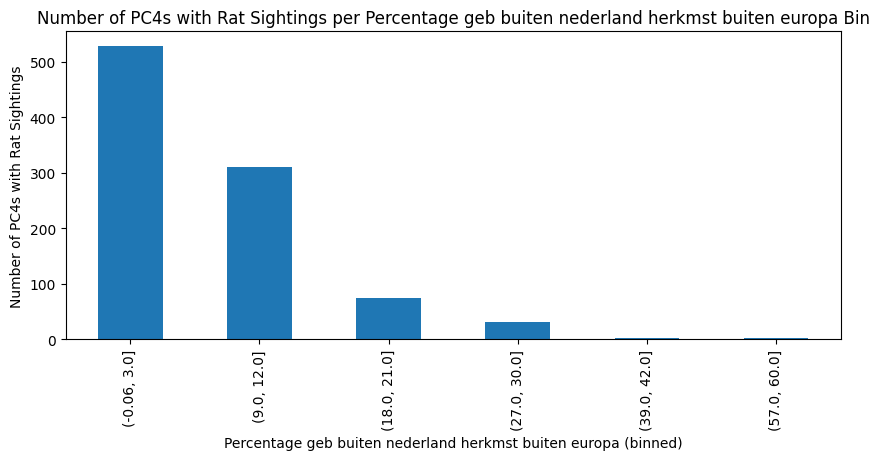

Investigating correlation between rat sightings and stedelijkheid

Spearman's Rho: -0.035798502837349845


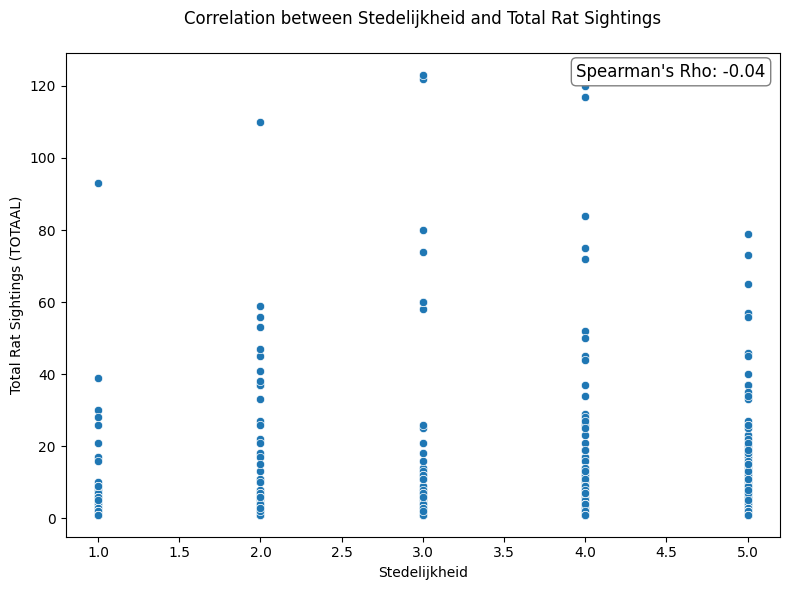

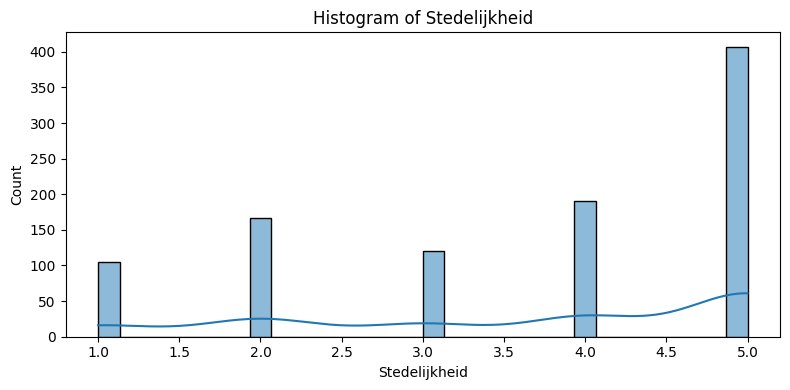

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


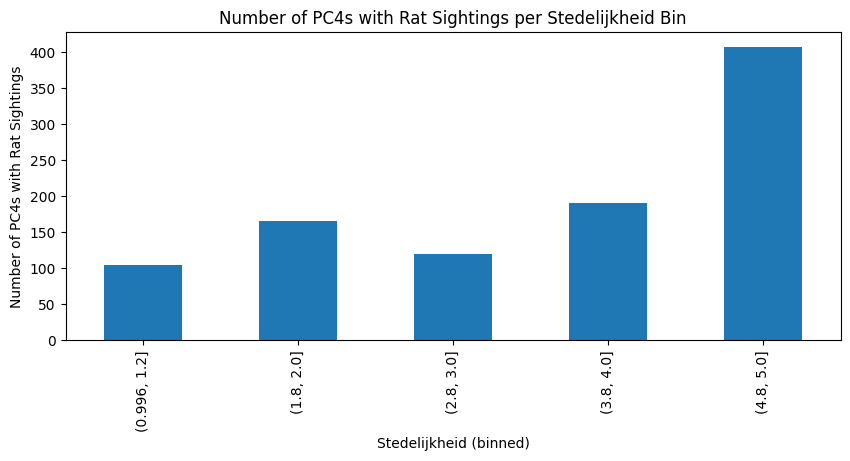

Investigating correlation between rat sightings and green_percentage

Spearman's Rho: -0.10483262707818945


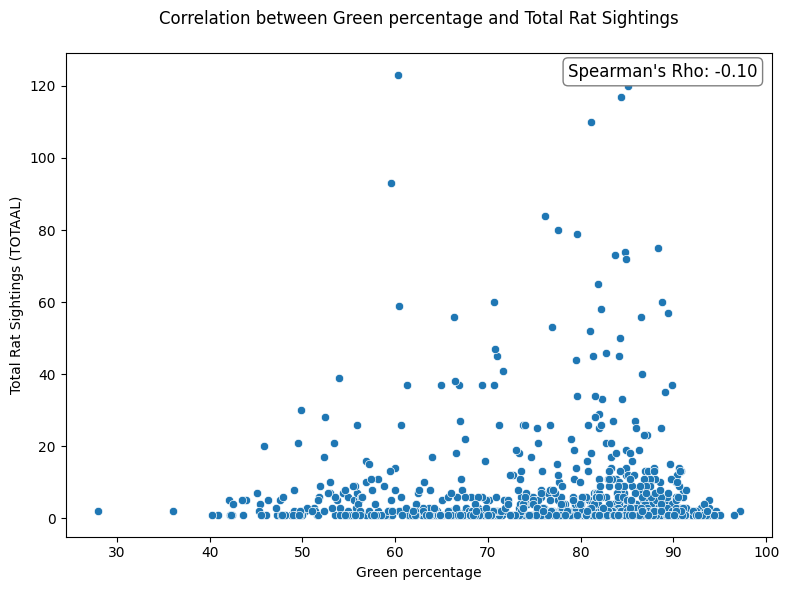

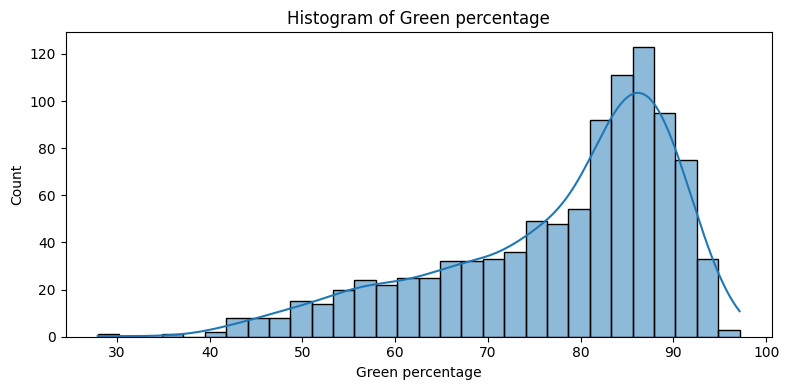

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


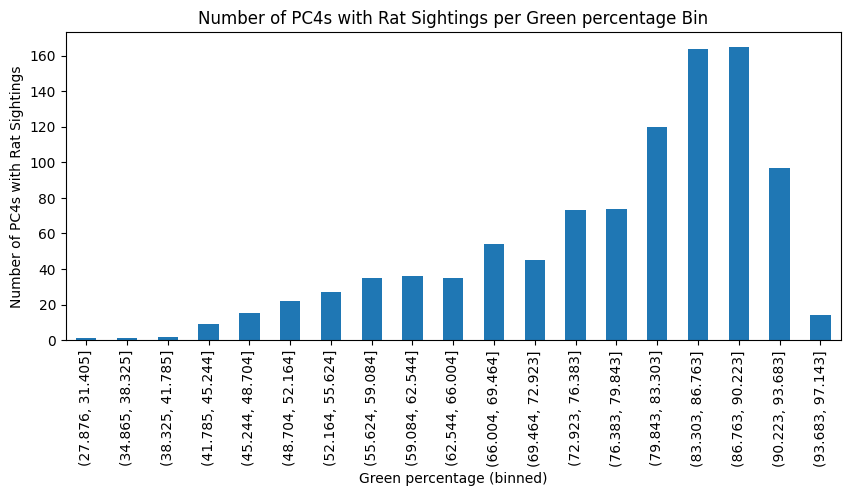

Investigating correlation between rat sightings and water_availability

Spearman's Rho: -0.07851813804428837


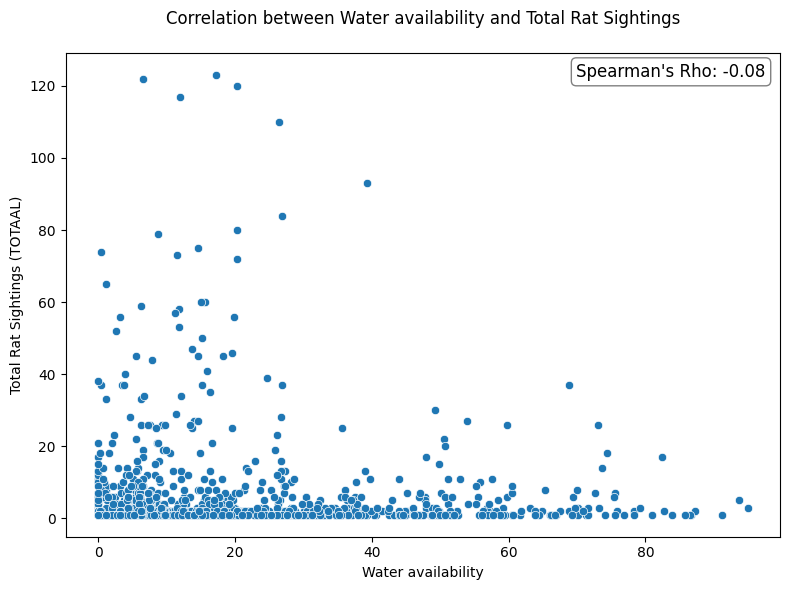

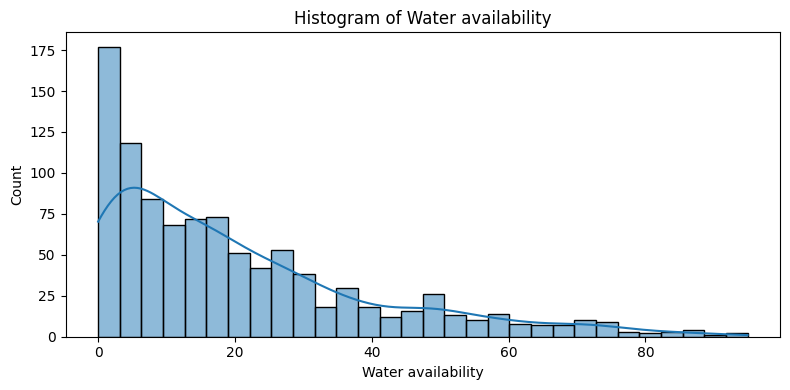

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


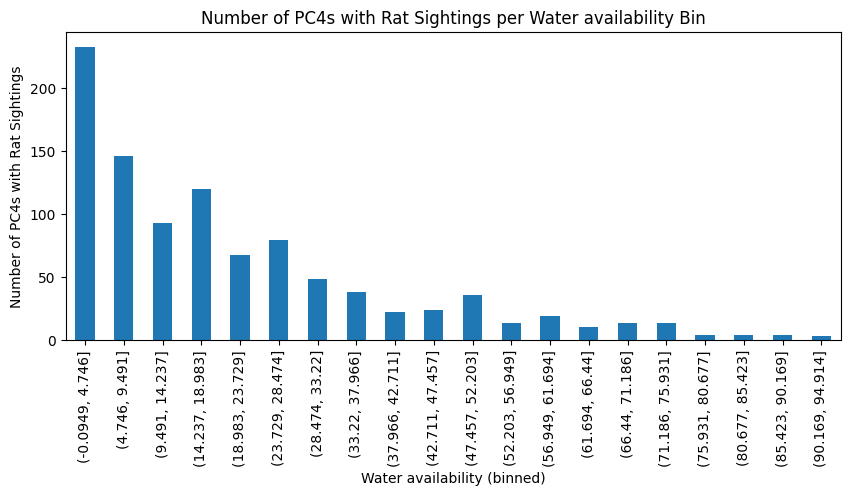

Investigating correlation between rat sightings and manholes_per_km2

Spearman's Rho: 0.06425888887456574


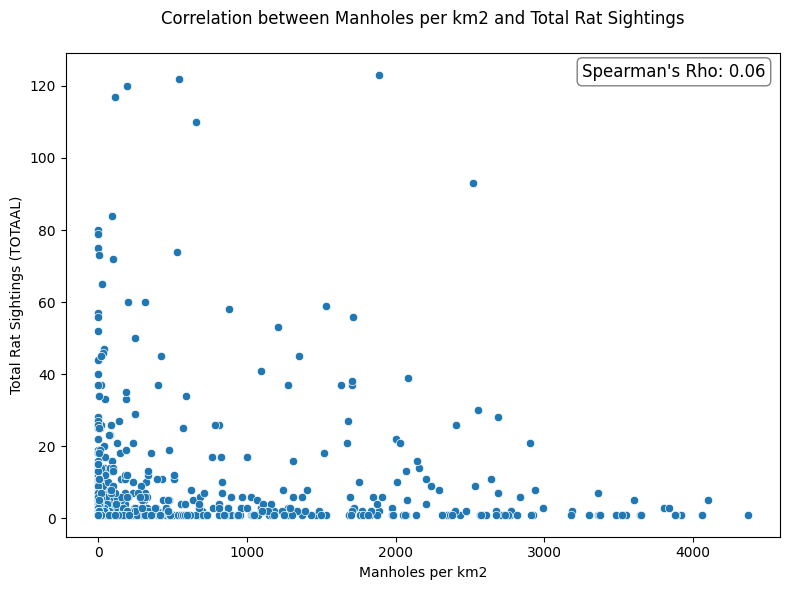

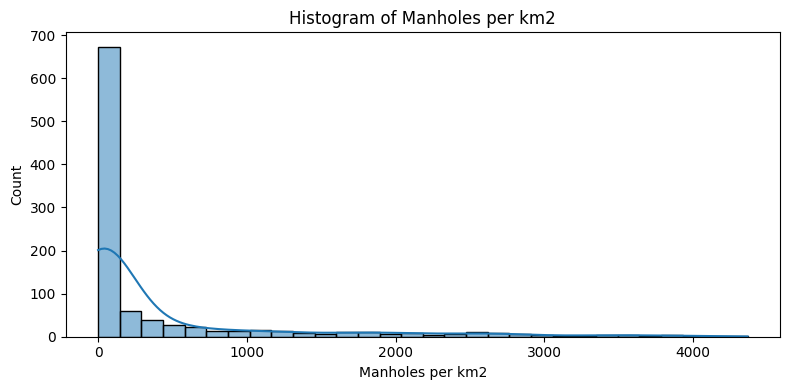

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


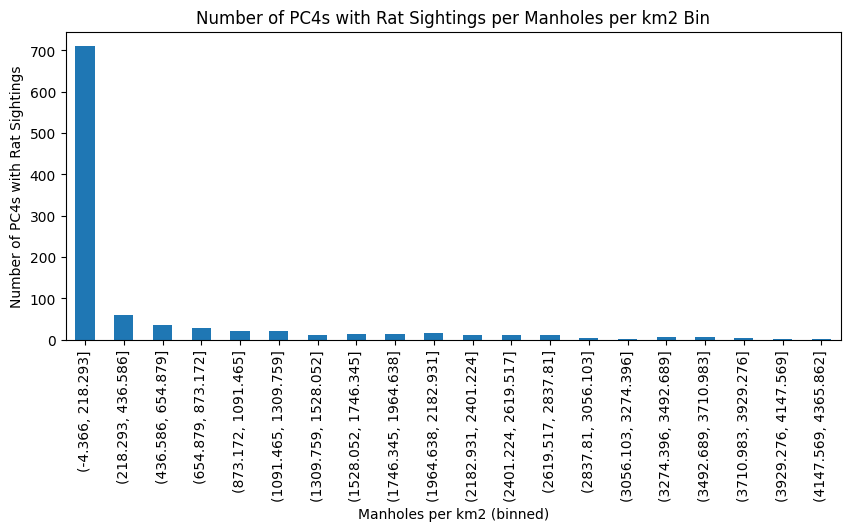

Investigating correlation between rat sightings and bins_per_km2

Spearman's Rho: 0.009877716160999453


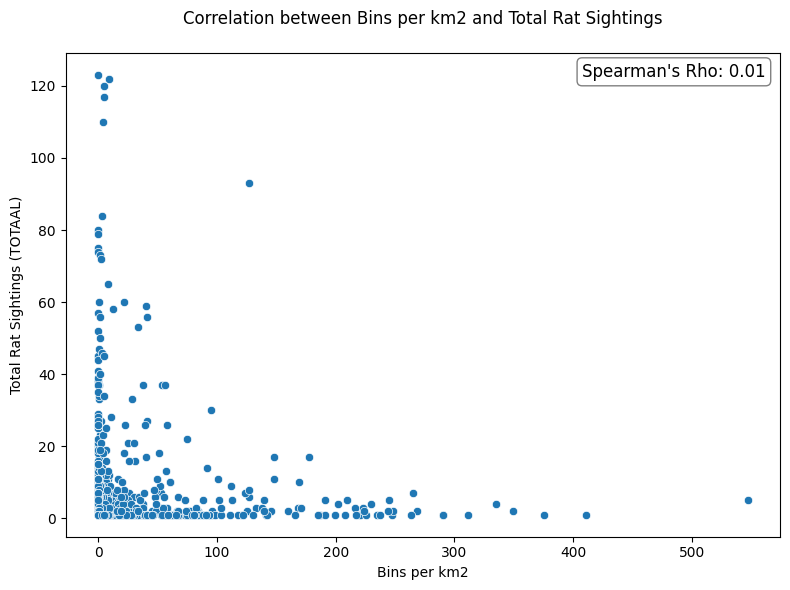

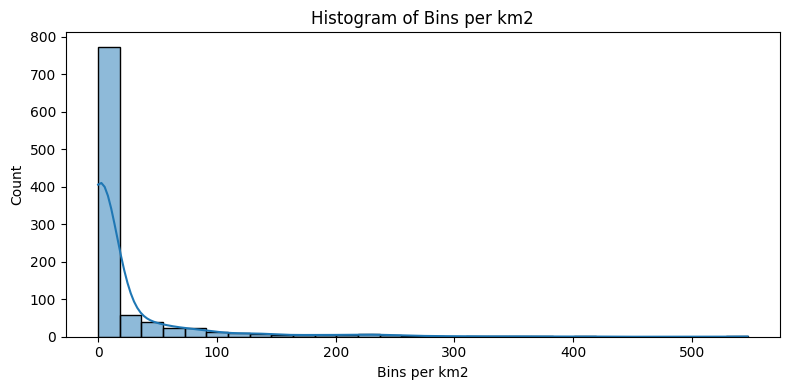

C:\Users\jerom\AppData\Local\Temp\ipykernel_9624\3305861372.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc4_counts = merged.groupby(binned)['has_sighting'].sum()


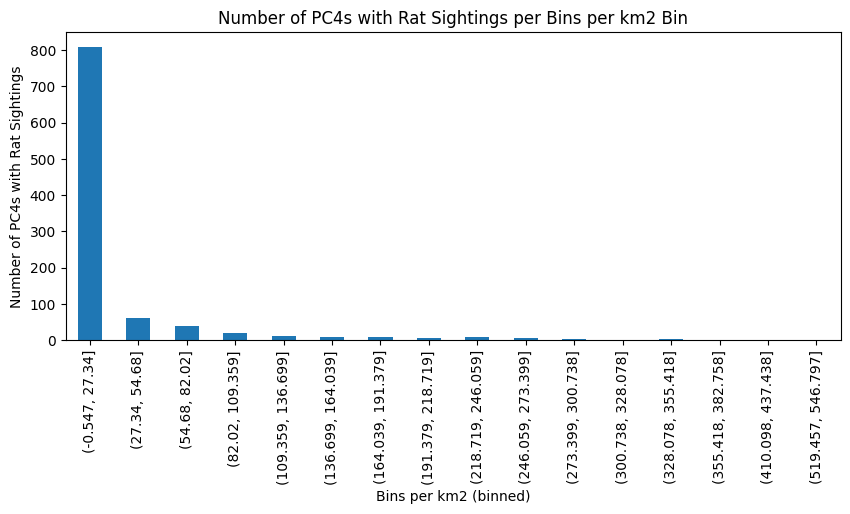

In [78]:
correlations = []

for col in cols_of_interest:
    # Drop NaNs and align indices
    series = variables_df[col].dropna()
    series.index = series.index.astype(int)
    pc_rat_df.index = pc_rat_df.index.astype(int)
    
    # Join with pc_rat_df
    merged = pc_rat_df.join(series, how='inner')
    merged = merged.dropna(subset=['TOTAAL', col])
    
    # Filter to values within 2 standard deviations of the mean for the column of interest
    mean_val = merged[col].mean()
    std_val = merged[col].std()
    within_2std = merged[(merged[col] >= mean_val - 2 * std_val) & (merged[col] <= mean_val + 2 * std_val)]

    # Calculate Spearman's Rho
    corr = merged[[col, 'TOTAAL']].corr('spearman').iloc[0,1]
    correlations.append(corr)

    # Print correlation coeffecient
    print(f"Investigating correlation between rat sightings and {col}\n")
    print(f"Spearman's Rho: {corr}")

    # Plot correlation
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged, x=col, y='TOTAAL')
    plt.title(f'Correlation between {col.replace("_", " ").capitalize()} and Total Rat Sightings\n')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Total Rat Sightings (TOTAAL)')

    # Annotate Spearman's rho in the top right
    plt.annotate(f"Spearman's Rho: {corr:.2f}", 
                    xy=(0.98, 0.98), xycoords='axes fraction', 
                    ha='right', va='top', fontsize=12, 
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))
    
    plt.tight_layout()
    plt.savefig(f"{data_folder_path}data_exploration/scatter_{col}.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Plot histogram for the column of interest
    plt.figure(figsize=(8, 4))
    sns.histplot(merged[col], bins=30, kde=True)
    plt.title(f'Histogram of {col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"{data_folder_path}data_exploration/hist_{col}.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Define a binary column: 1 if TOTAAL > 0 (rat sighting), else 0
    merged['has_sighting'] = merged['TOTAAL'] > 0

    # Plot histogram of rat sightings binned by variable
    if pd.api.types.is_numeric_dtype(merged[col]):
        # For continuous columns, bin the data
        bins = 20  # You can adjust the number of bins
        binned = pd.cut(merged[col], bins=bins)
        pc4_counts = merged.groupby(binned)['has_sighting'].sum()
        pc4_counts = pc4_counts[pc4_counts > 0]  # Only show bins with sightings
        plt.figure(figsize=(10, 4))
        ax = pc4_counts.plot(kind='bar')
        plt.title(f'Number of PC4s with Rat Sightings per {col.replace("_", " ").capitalize()} Bin')
        plt.xlabel(f'{col.replace("_", " ").capitalize()} (binned)')
        plt.ylabel('Number of PC4s with Rat Sightings')
    else:
        # For categorical columns
        pc4_counts = merged.groupby(col)['has_sighting'].sum()
        pc4_counts = pc4_counts[pc4_counts > 0]
        plt.figure(figsize=(10, 4))
        ax = pc4_counts.plot(kind='bar')
        plt.title(f'Number of PC4s with Rat Sightings per {col.replace("_", " ").capitalize()} Category')
        plt.xlabel(col.replace("_", " ").capitalize())
        plt.ylabel('Number of PC4s with Rat Sightings')
        plt.tight_layout()

    # Save and show histogram
    plt.savefig(f"{data_folder_path}data_exploration/hist_sightings_{col}.png", dpi=300, bbox_inches='tight')
    plt.show()


correlation_df = pd.DataFrame({'variable': cols_of_interest, 'total': correlations})
    

### Scatterplots with rat sighting with >5 rats

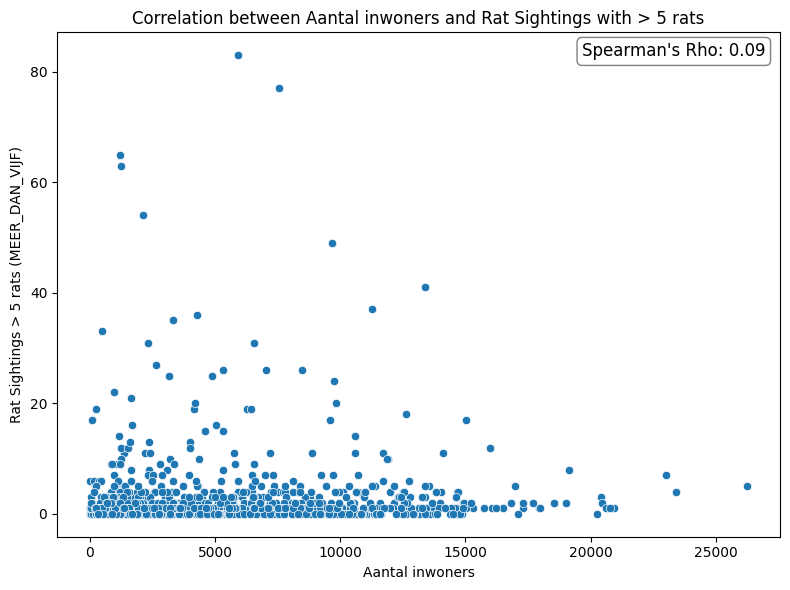

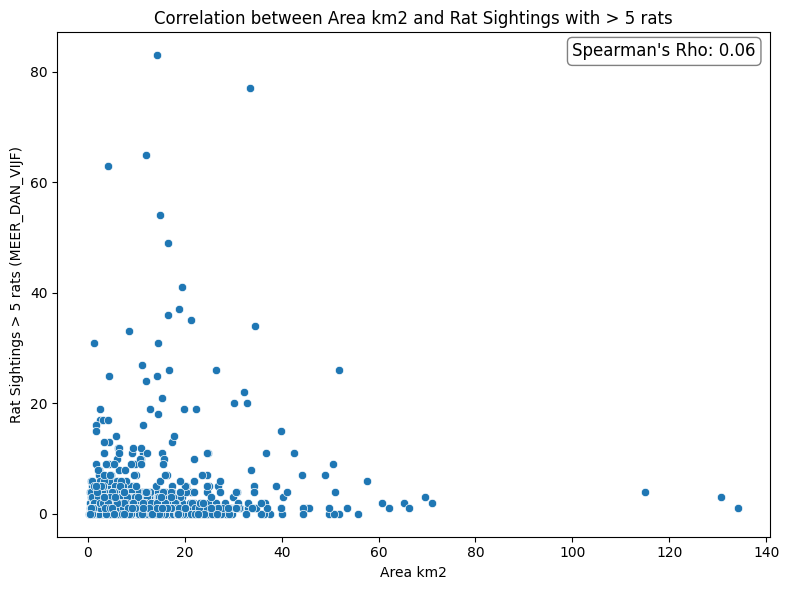

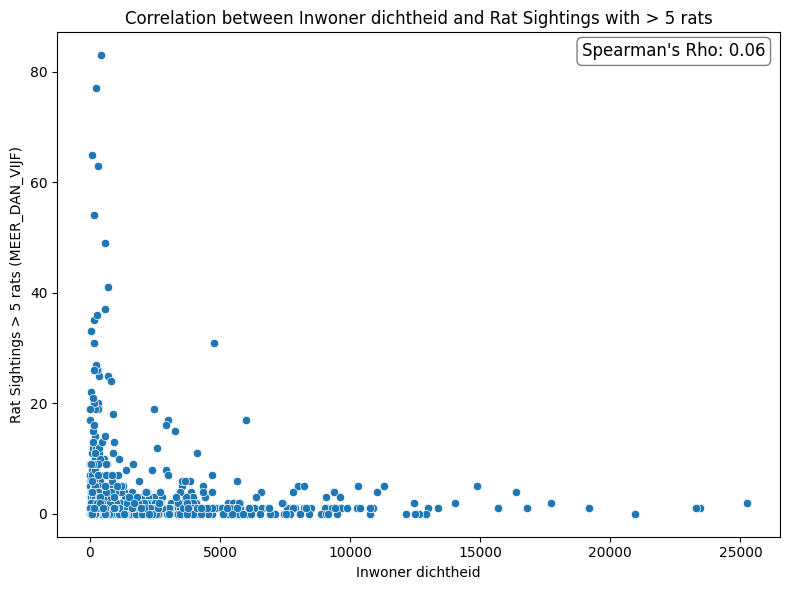

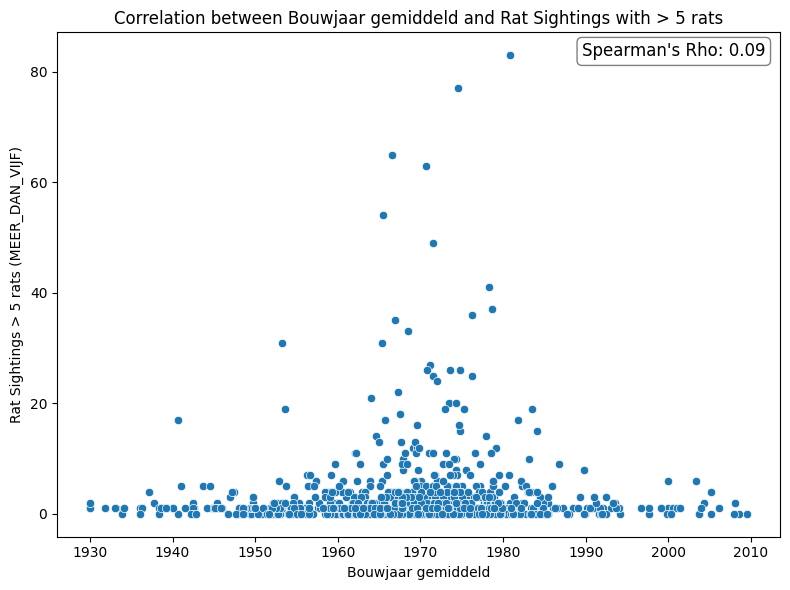

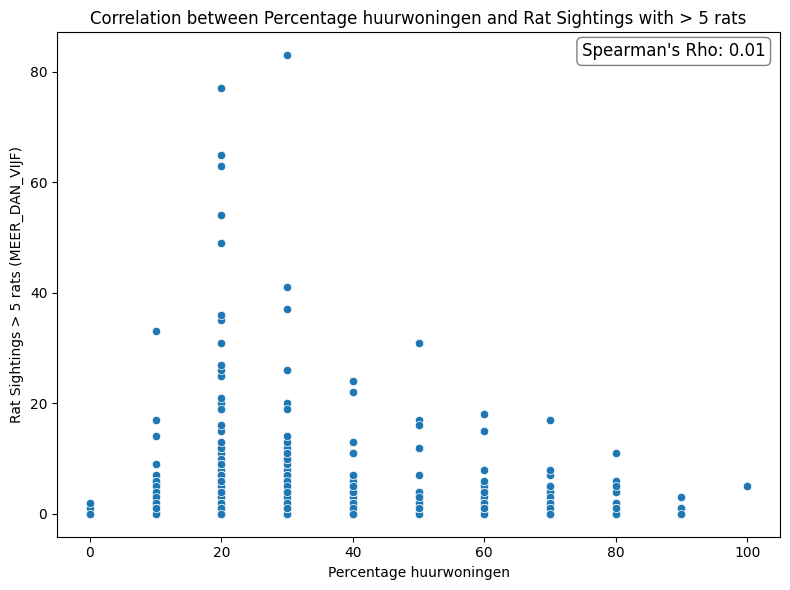

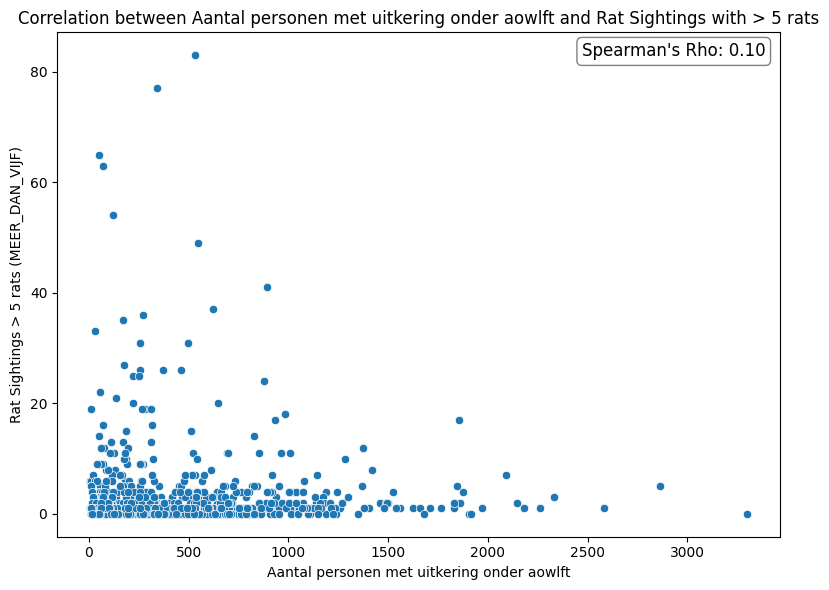

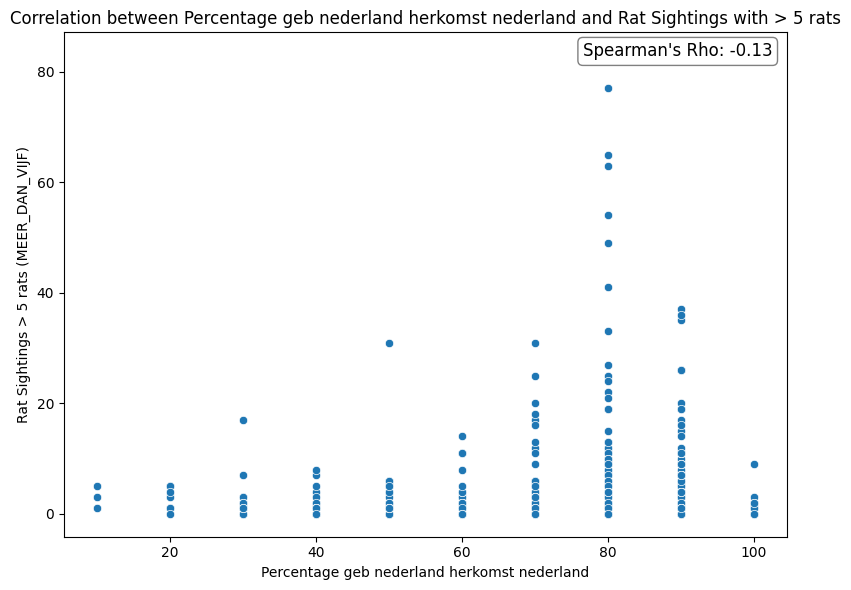

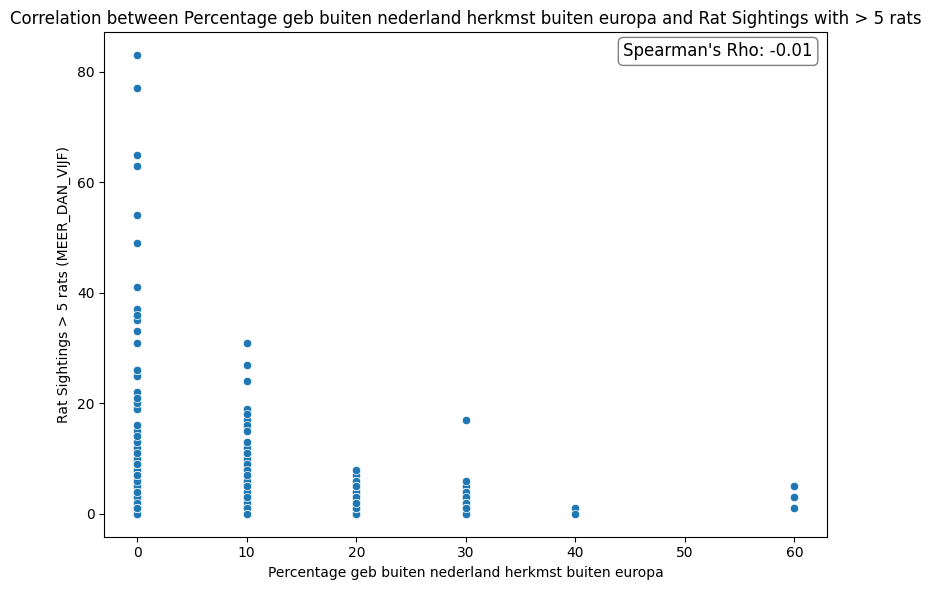

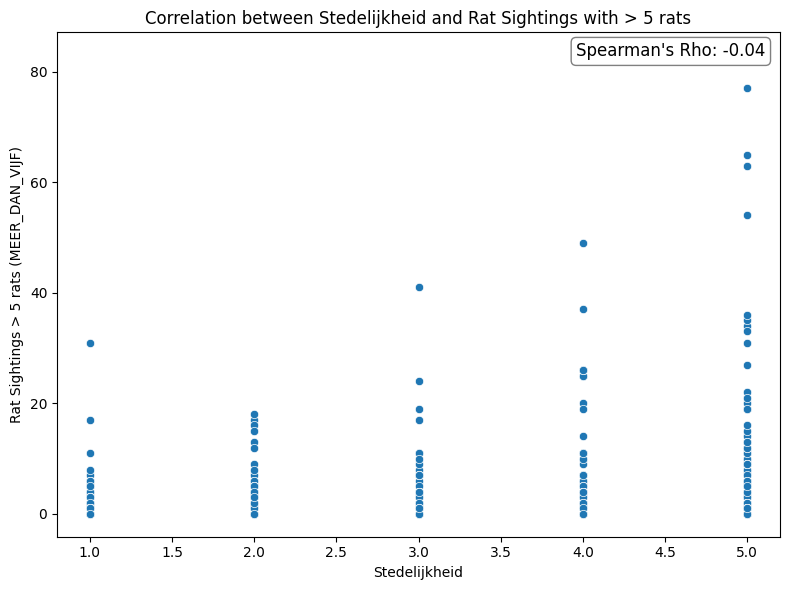

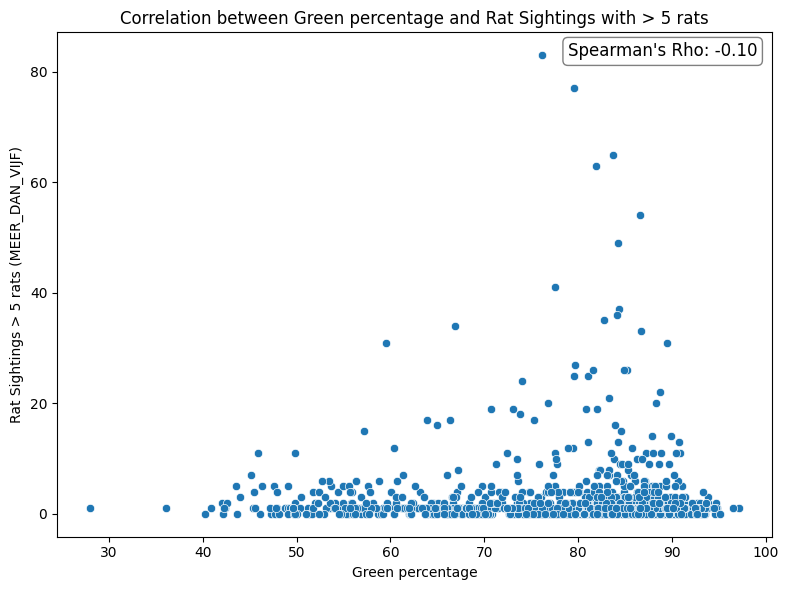

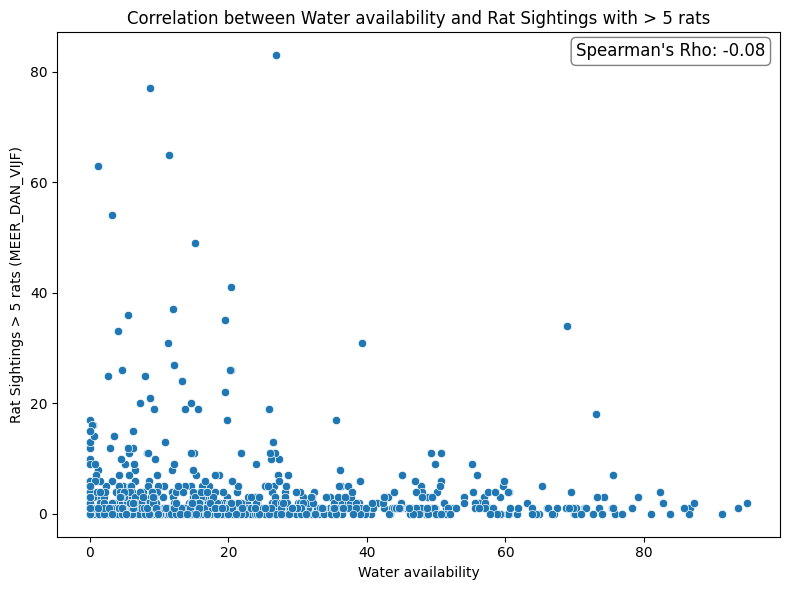

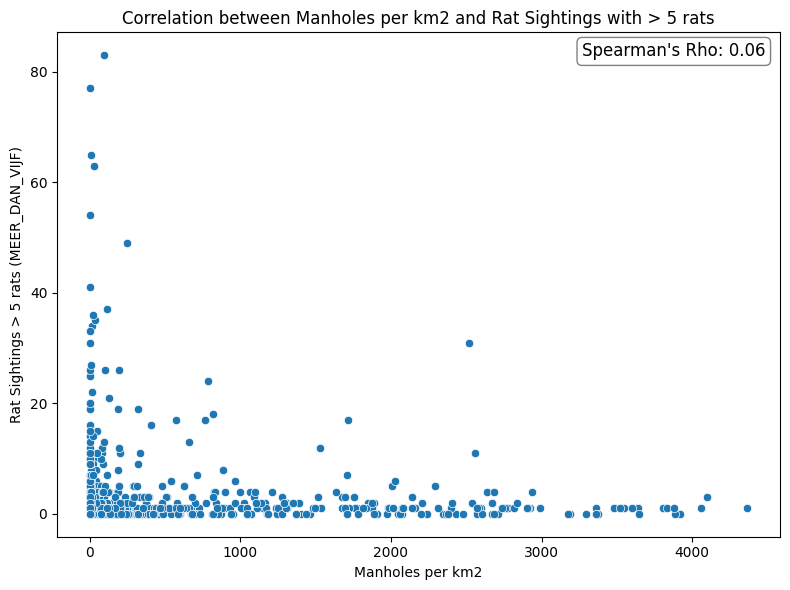

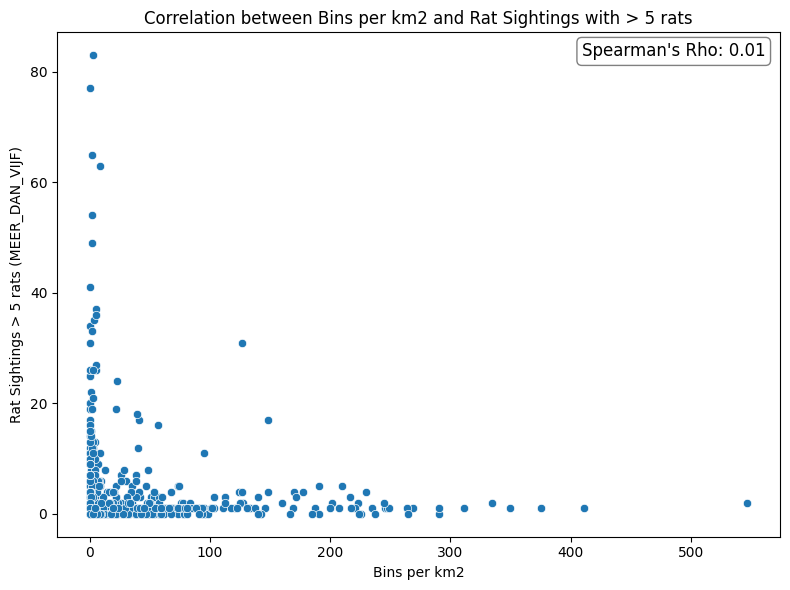

In [79]:
correlations = []

for col in cols_of_interest:
    # Drop NaNs and align indices
    series = variables_df[col].dropna()
    series.index = series.index.astype(int)
    pc_rat_df.index = pc_rat_df.index.astype(int)
    
    # Join with pc_rat_df
    merged = pc_rat_df.join(series, how='inner')
    merged = merged.dropna(subset=['MEER_DAN_VIJF', col])

    # Calculate Spearman's Rho
    corr = merged[[col, 'TOTAAL']].corr('spearman').iloc[0,1]
    correlations.append(corr)
    
    # Plot correlation
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged, x=col, y='MEER_DAN_VIJF')
    plt.title(f'Correlation between {col.replace("_", " ").capitalize()} and Rat Sightings with > 5 rats')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Rat Sightings > 5 rats (MEER_DAN_VIJF)')

    # Annotate Spearman's rho in the top right
    plt.annotate(f"Spearman's Rho: {corr:.2f}", 
                    xy=(0.98, 0.98), xycoords='axes fraction', 
                    ha='right', va='top', fontsize=12, 
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

    plt.tight_layout()
    plt.show()


correlation_df['more_than_5'] = correlations

### Scatterplots with normalized rat sightings

In [50]:
# Ensure indices are int and aligned
pc_rat_df.index = pc_rat_df.index.astype(int)
cbs_df.index = cbs_df.index.astype(int)

# Calculate normalized sightings
valid_population = cbs_df['aantal_inwoners'].replace(0, np.nan)
pc_rat_df['TOTAAL_PER_1000'] = (
    pc_rat_df['TOTAAL'] / valid_population * 1000
)

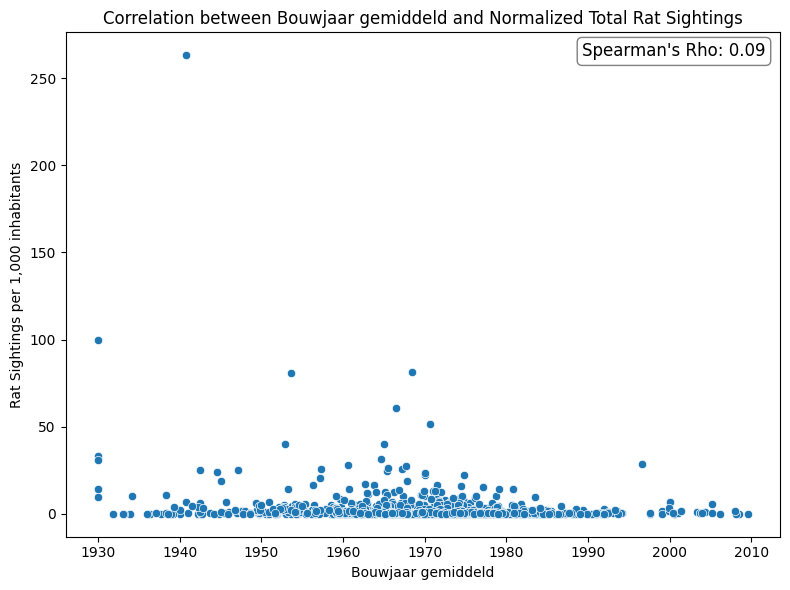

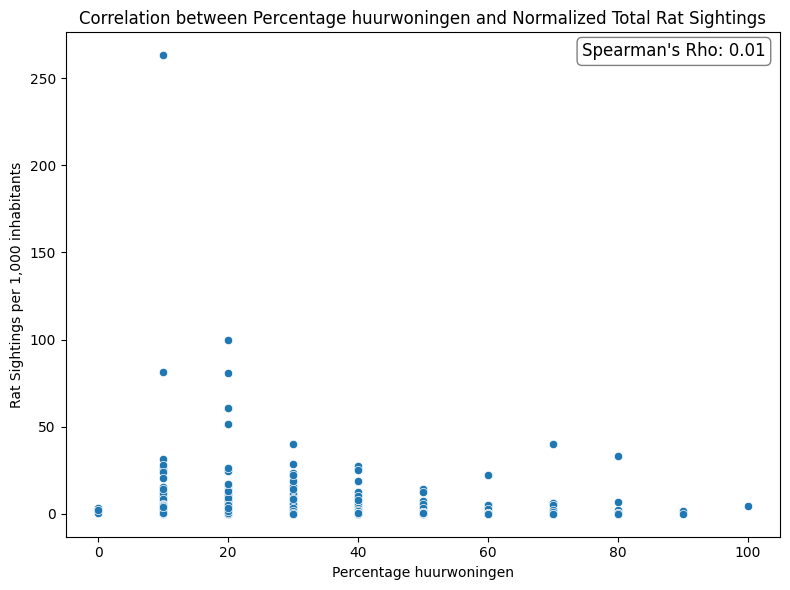

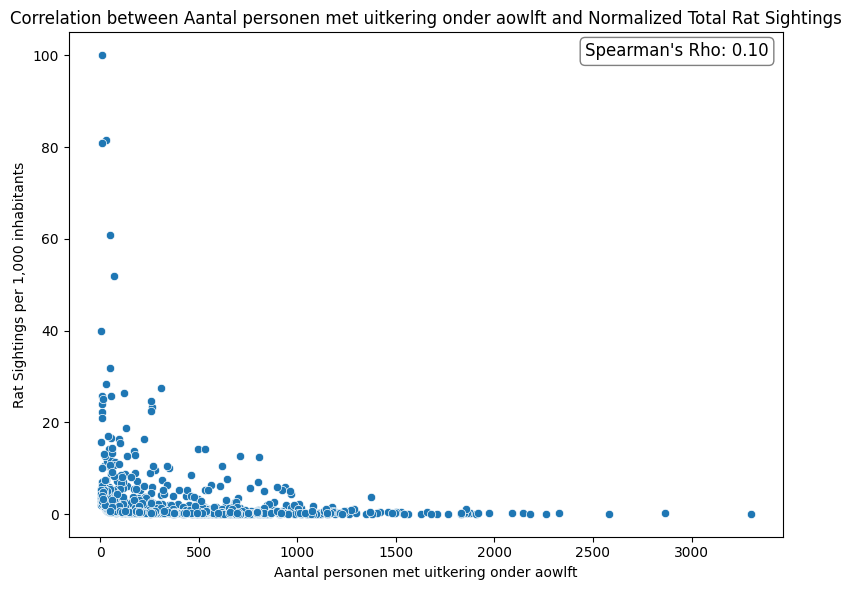

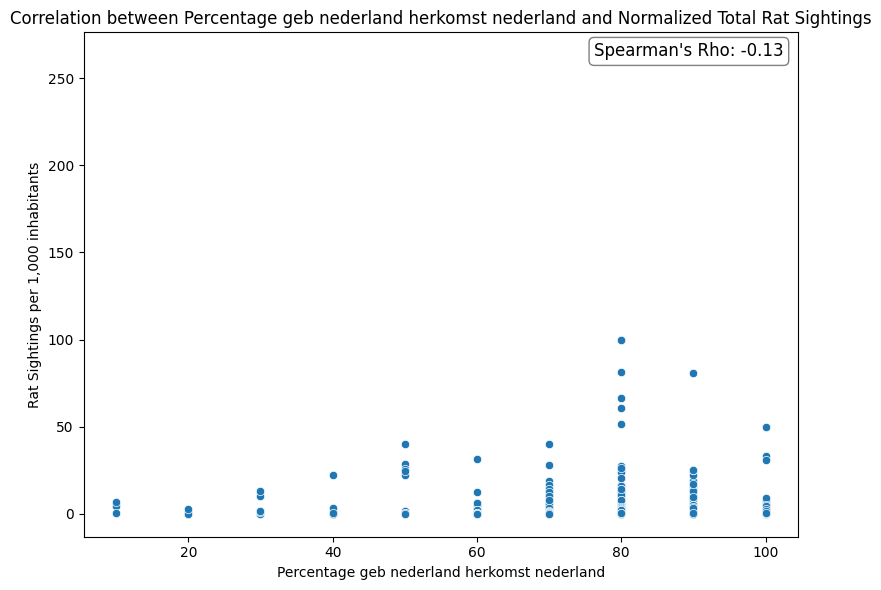

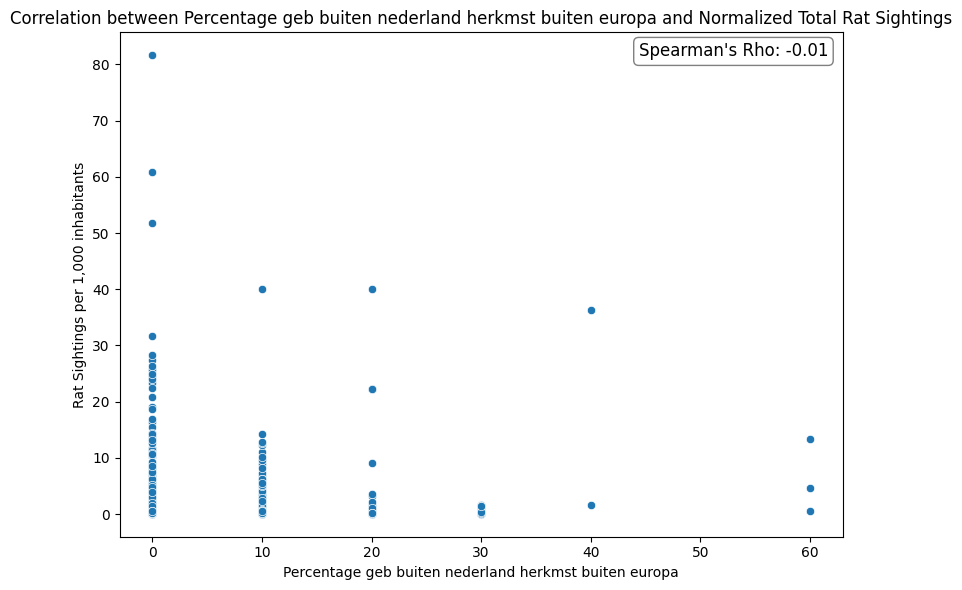

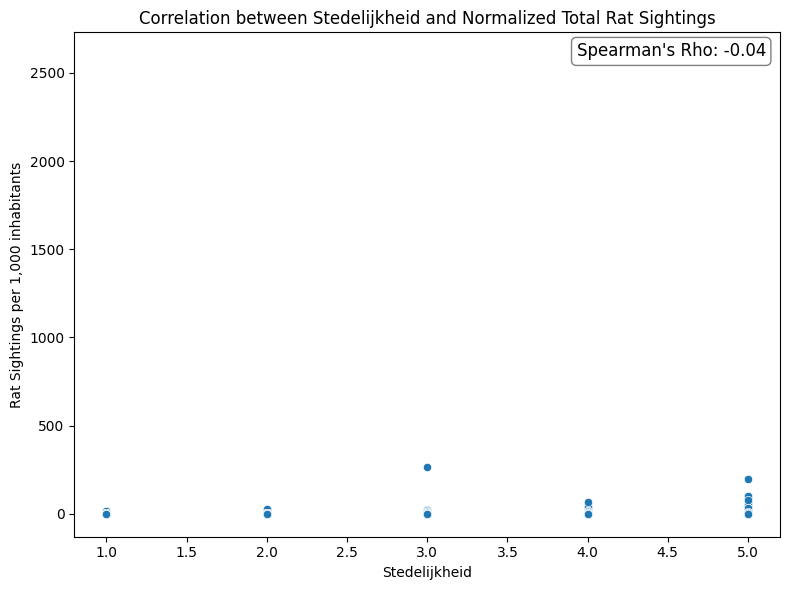

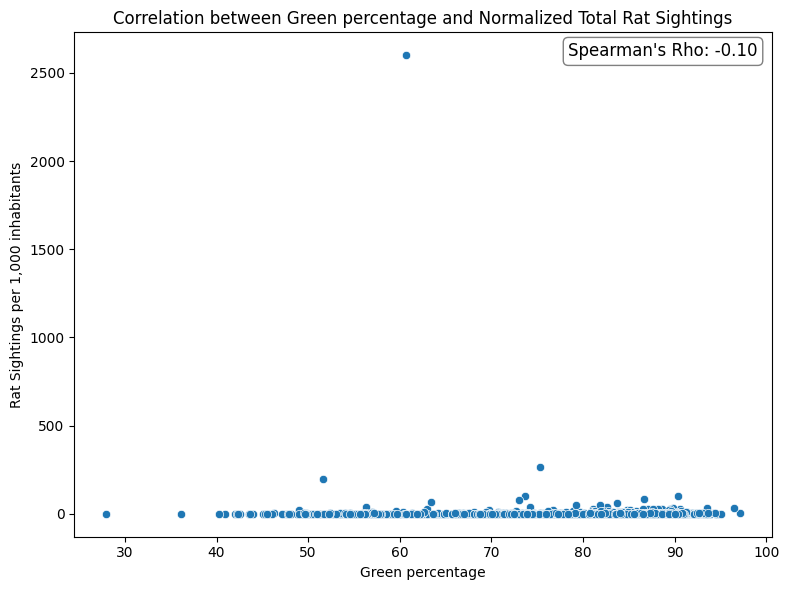

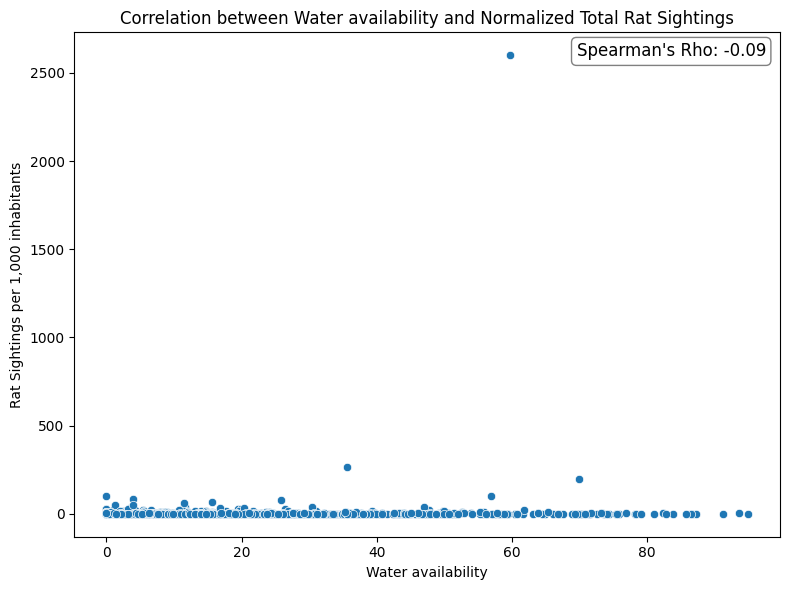

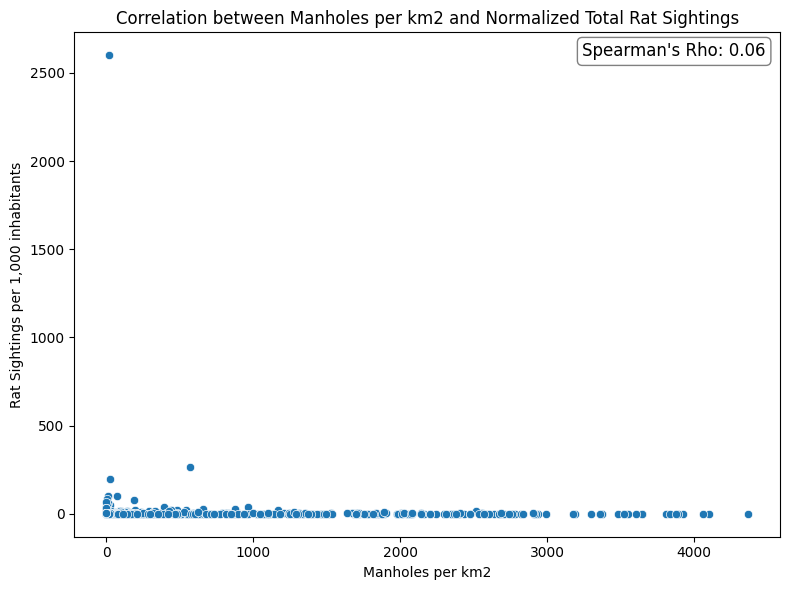

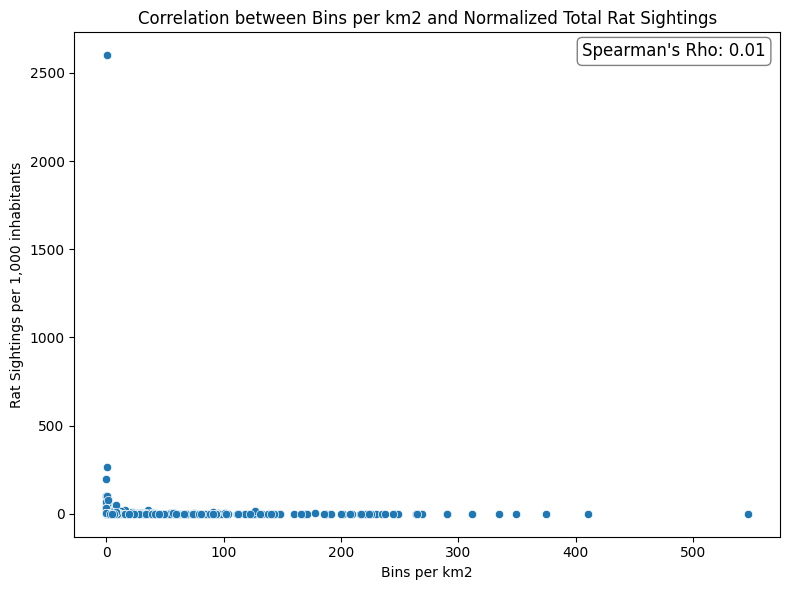

In [64]:
correlations = [np.nan, np.nan, np.nan]

# Plot normalized sightings vs. columns of interest
for col in cols_of_interest[3:]:
    merged = pc_rat_df.join(variables_df[col], how='inner')
    merged = merged.dropna(subset=['TOTAAL_PER_1000', col])
    
    # Calculate Spearman's Rho
    corr = merged[[col, 'TOTAAL']].corr('spearman').iloc[0,1]
    correlations.append(corr)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged, x=col, y='TOTAAL_PER_1000')
    plt.title(f'Correlation between {col.replace("_", " ").capitalize()} and Normalized Total Rat Sightings')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Rat Sightings per 1,000 inhabitants')

    # Annotate Spearman's rho in the top right
    plt.annotate(f"Spearman's Rho: {corr:.2f}", 
                    xy=(0.98, 0.98), xycoords='axes fraction', 
                    ha='right', va='top', fontsize=12, 
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

    plt.tight_layout()
    plt.show()


correlation_df['normalized_total'] = correlations

### Filtered scatterplots

#### Filtered out low amount of rat sightings

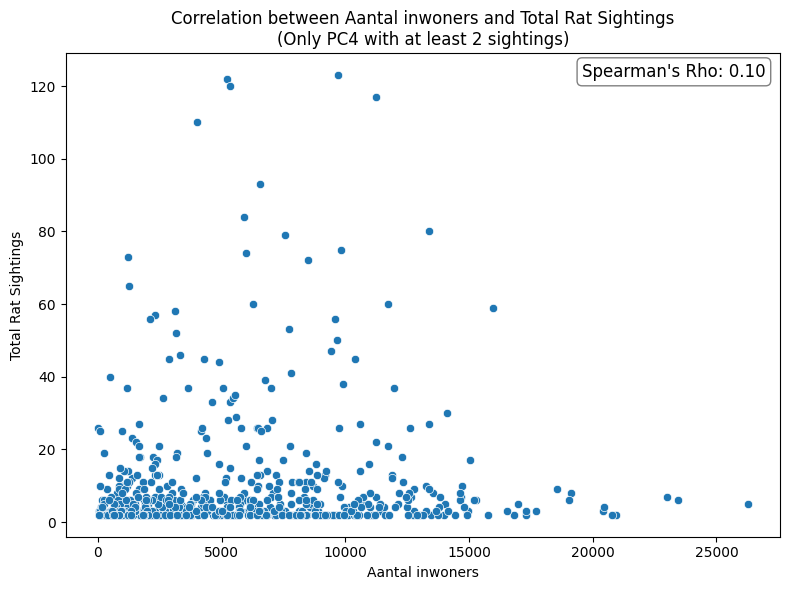

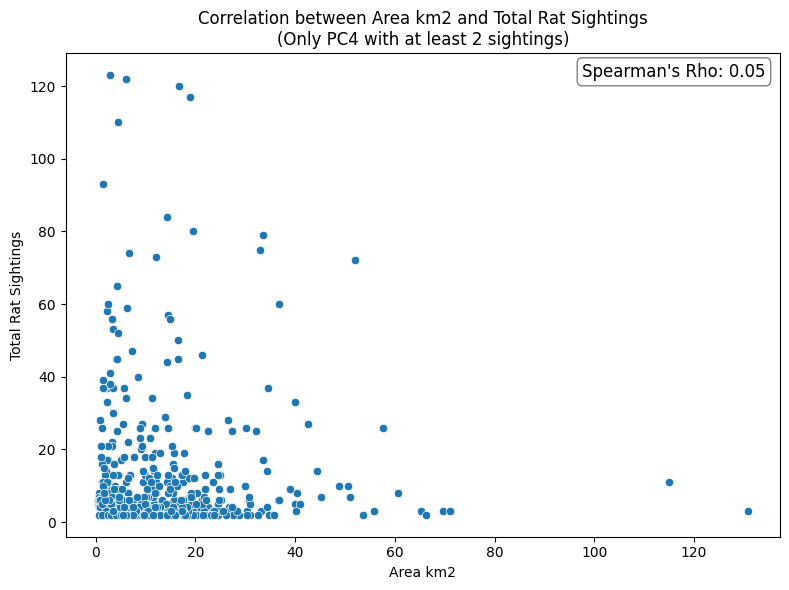

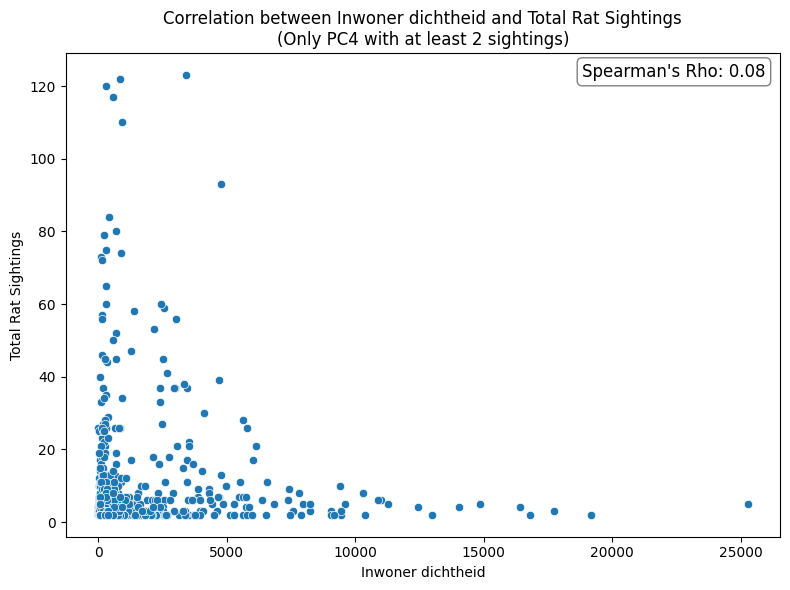

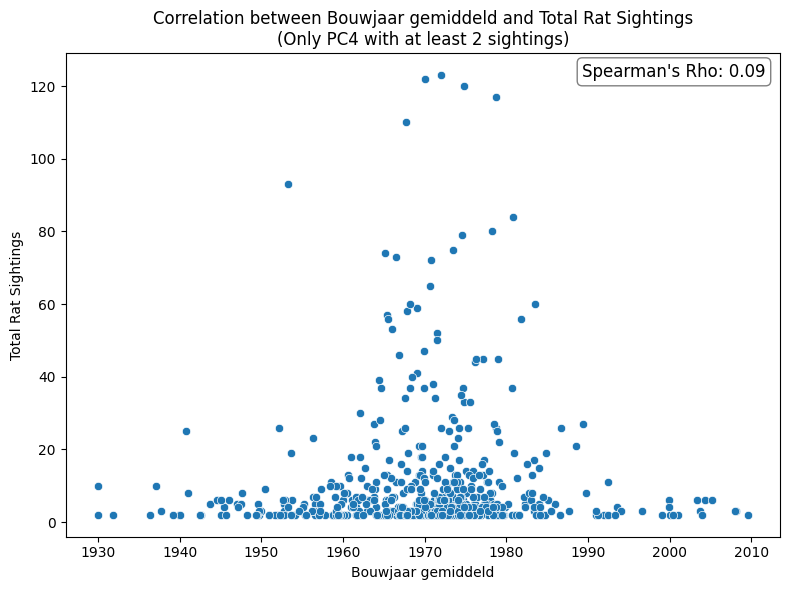

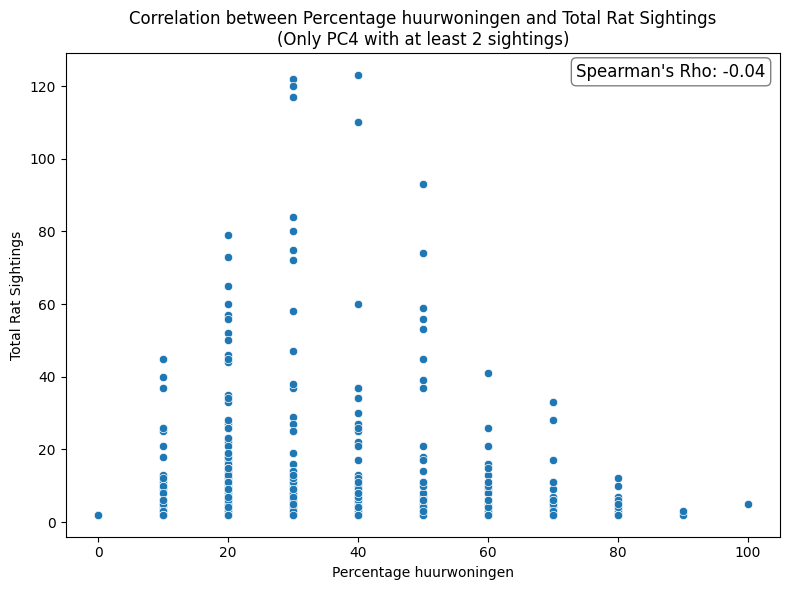

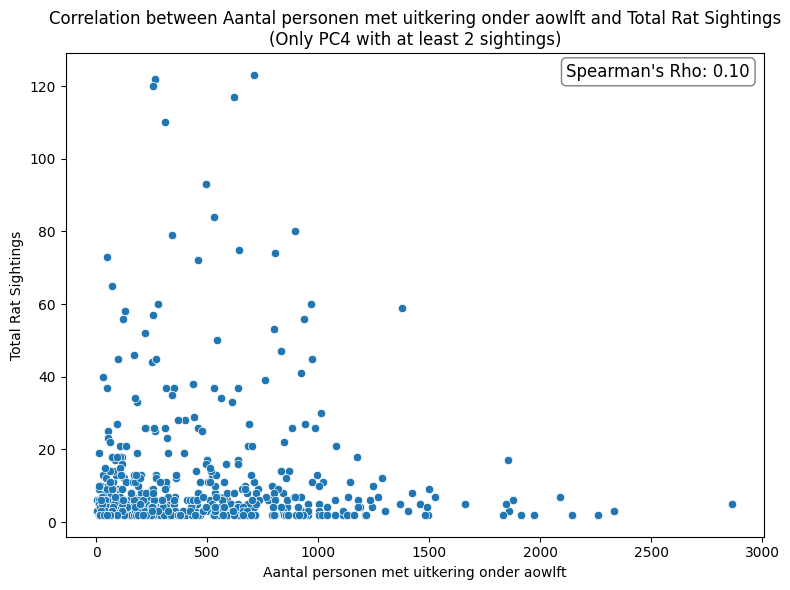

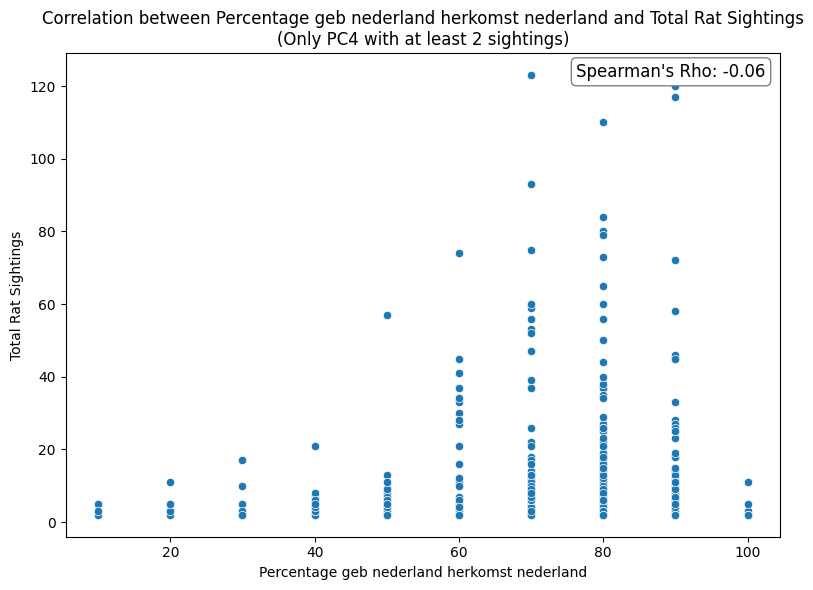

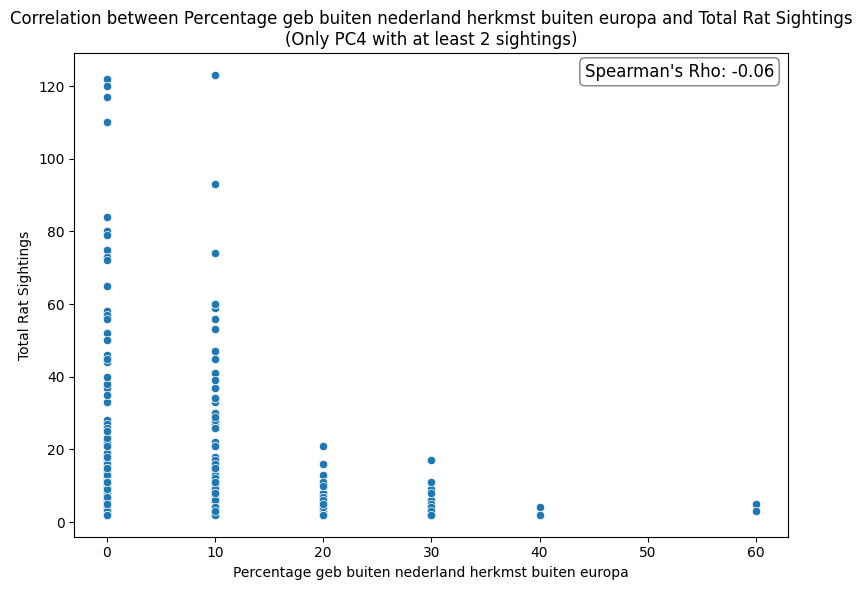

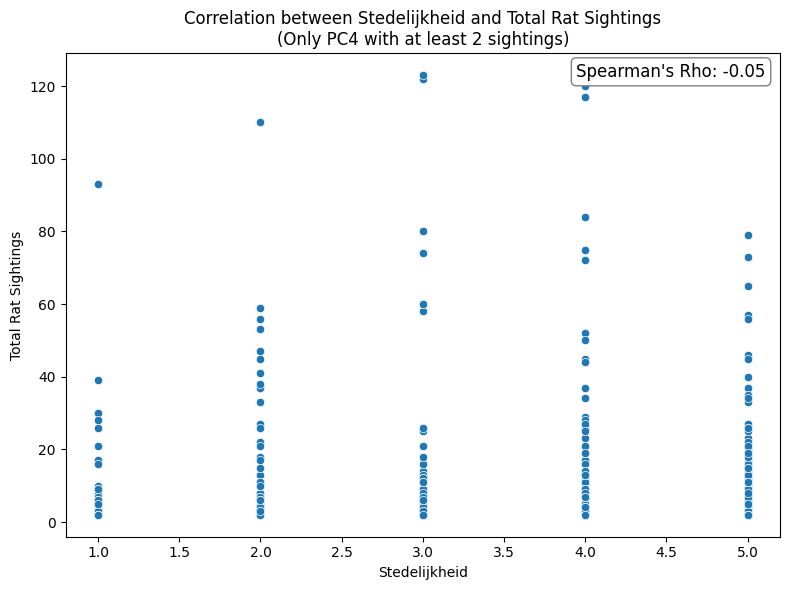

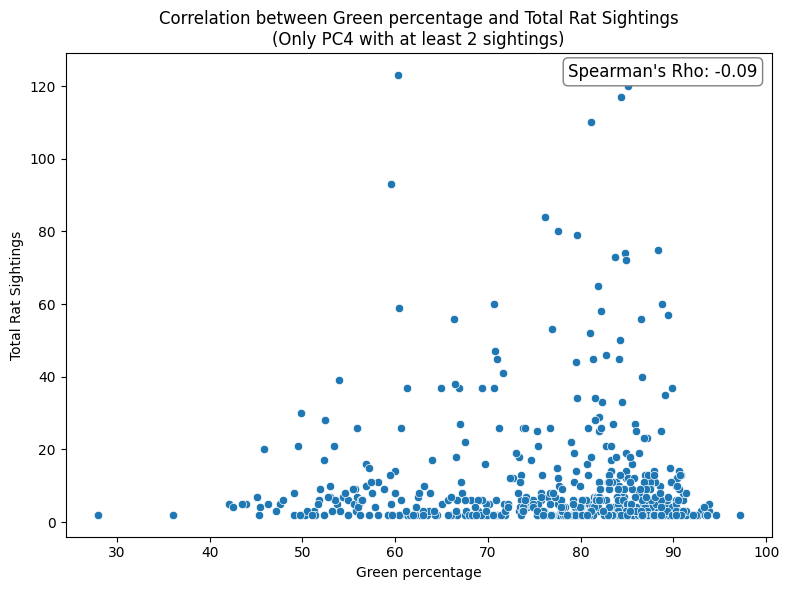

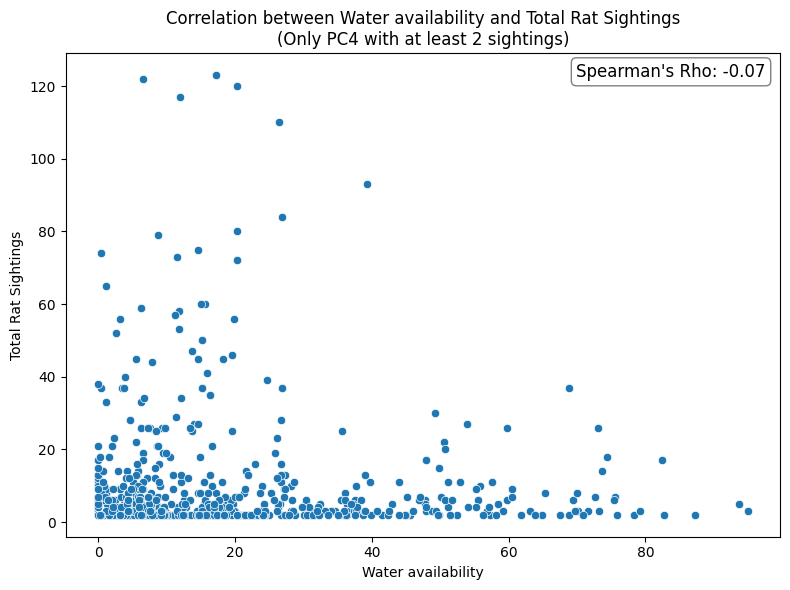

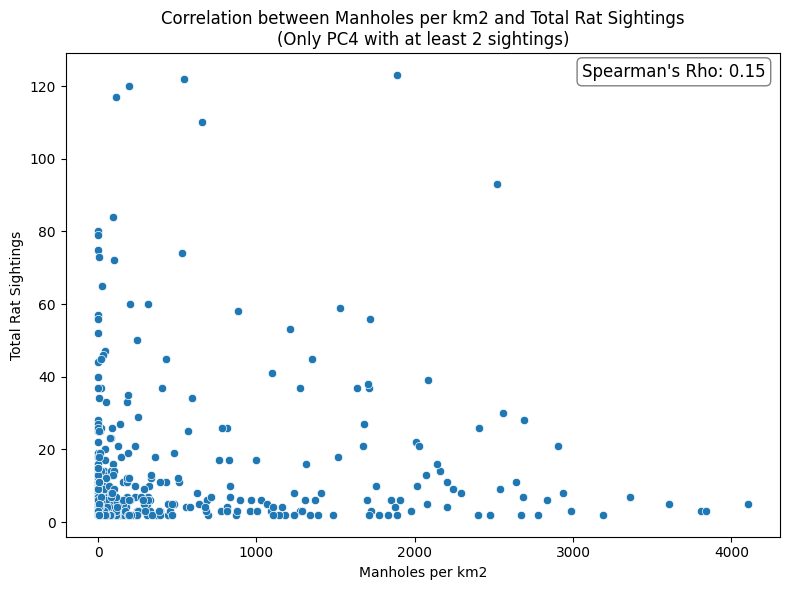

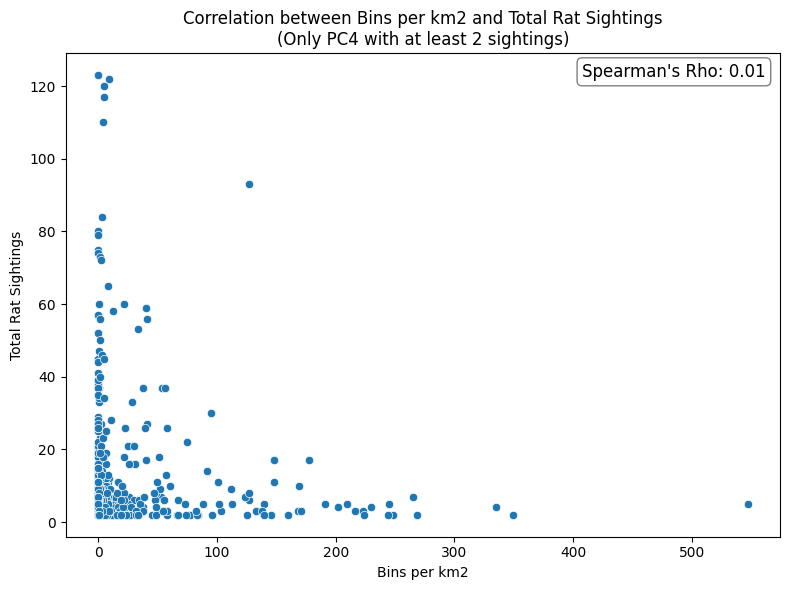

In [65]:
# Filter to postal codes with at least 2 sightings
min_sightings = 2
filtered_stats = pc_rat_df[pc_rat_df['TOTAAL'] >= min_sightings]

correlations = []

for col in cols_of_interest:
    merged = filtered_stats.join(variables_df[col], how='inner')
    merged = merged.dropna(subset=['TOTAAL', col])

    # Calculate Spearman's Rho
    corr = merged[[col, 'TOTAAL']].corr('spearman').iloc[0,1]
    correlations.append(corr)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged, x=col, y='TOTAAL')
    plt.title(f'Correlation between {col.replace('_', ' ').capitalize()} and Total Rat Sightings\n(Only PC4 with at least {min_sightings} sightings)')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Total Rat Sightings')

    # Annotate Spearman's rho in the top right
    plt.annotate(f"Spearman's Rho: {corr:.2f}", 
                xy=(0.98, 0.98), xycoords='axes fraction', 
                ha='right', va='top', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

    plt.tight_layout()
    plt.show()


correlation_df['atleast_2_sightings'] = correlations

#### Filtered to urban areas

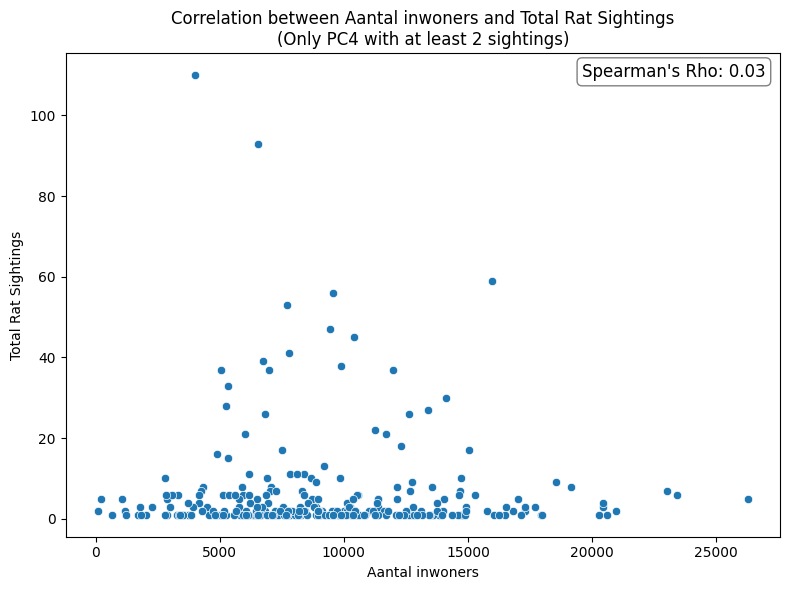

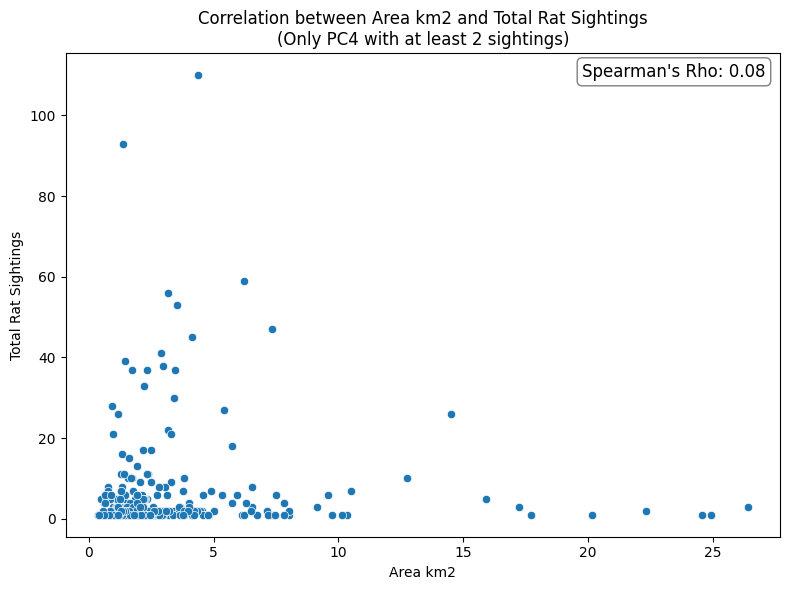

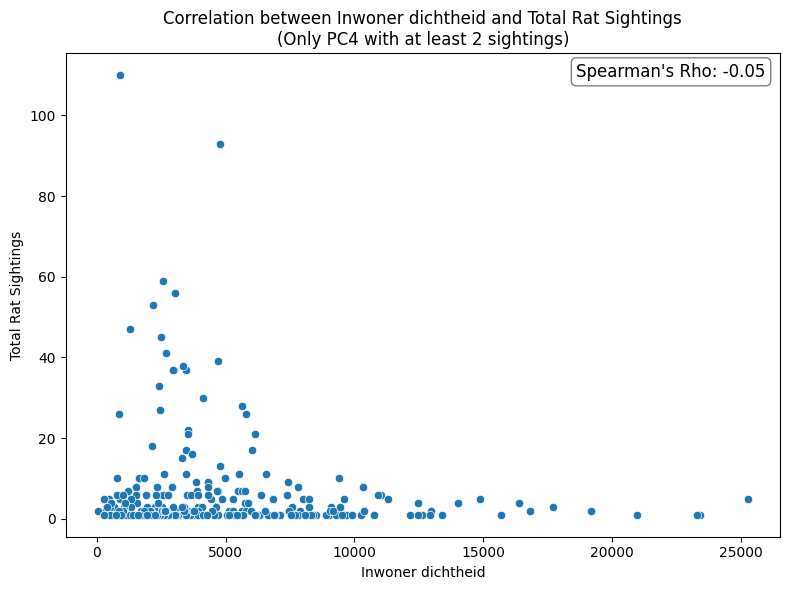

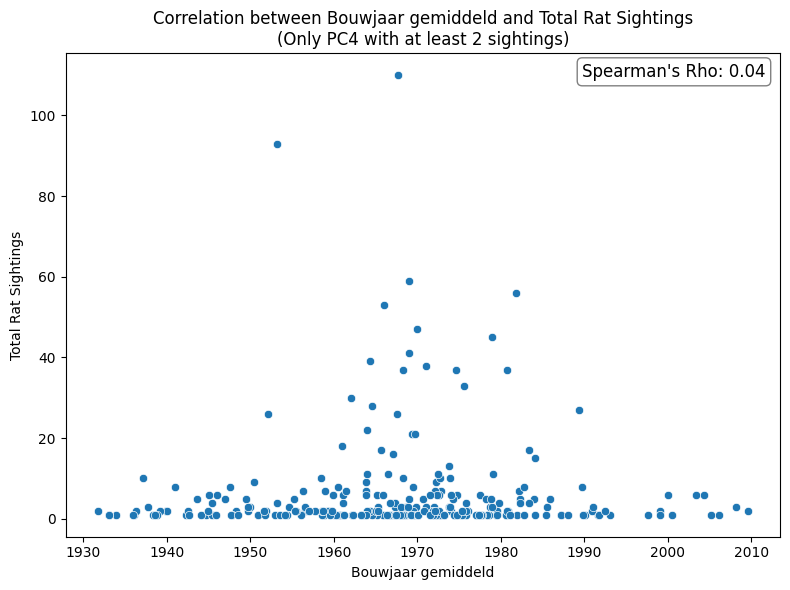

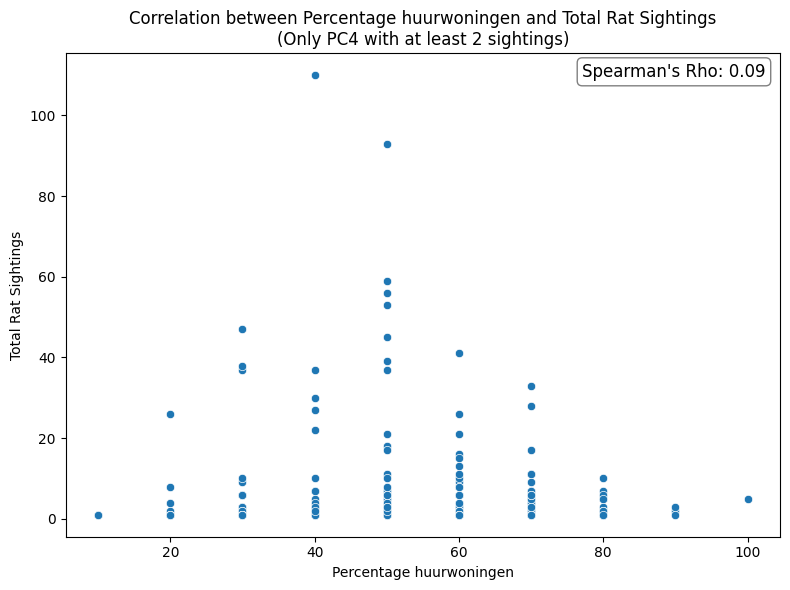

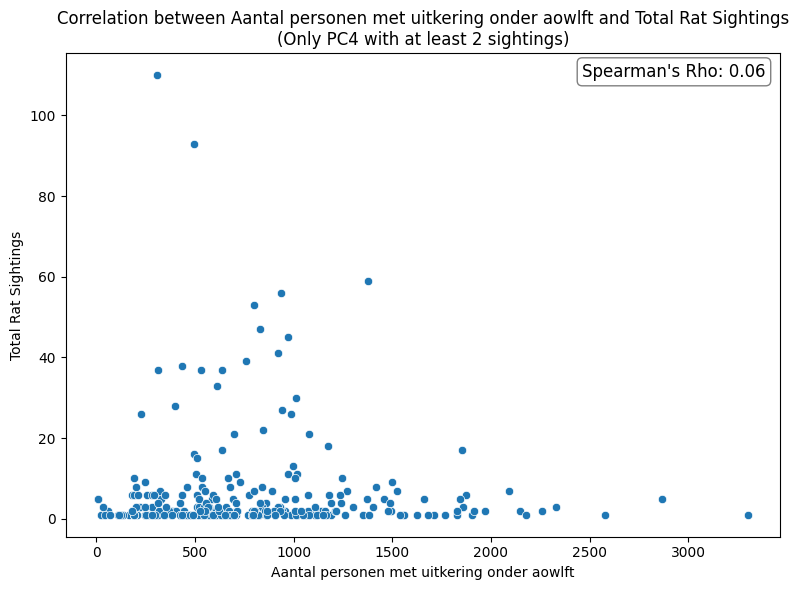

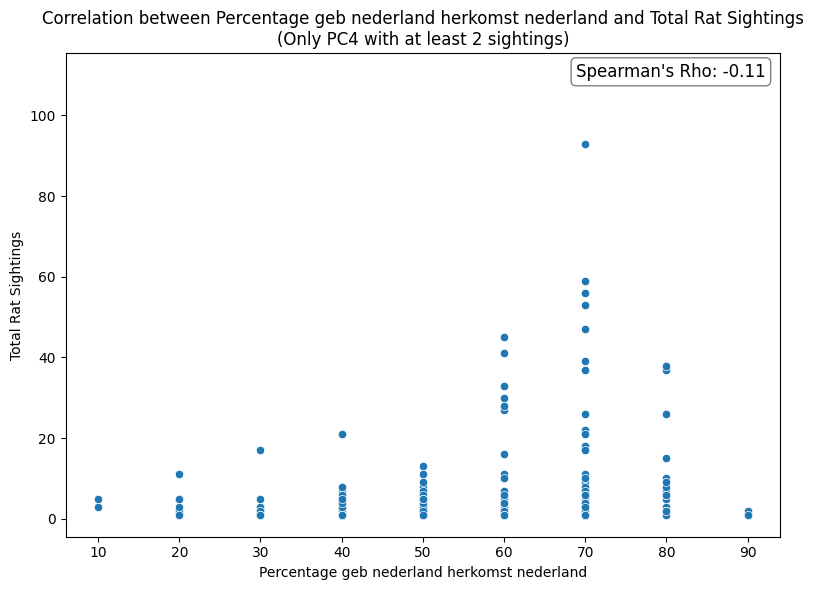

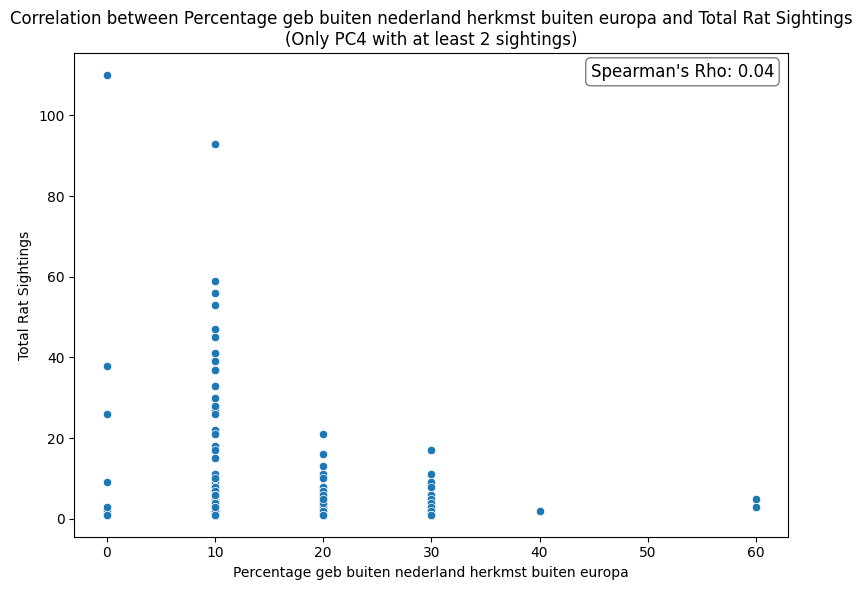

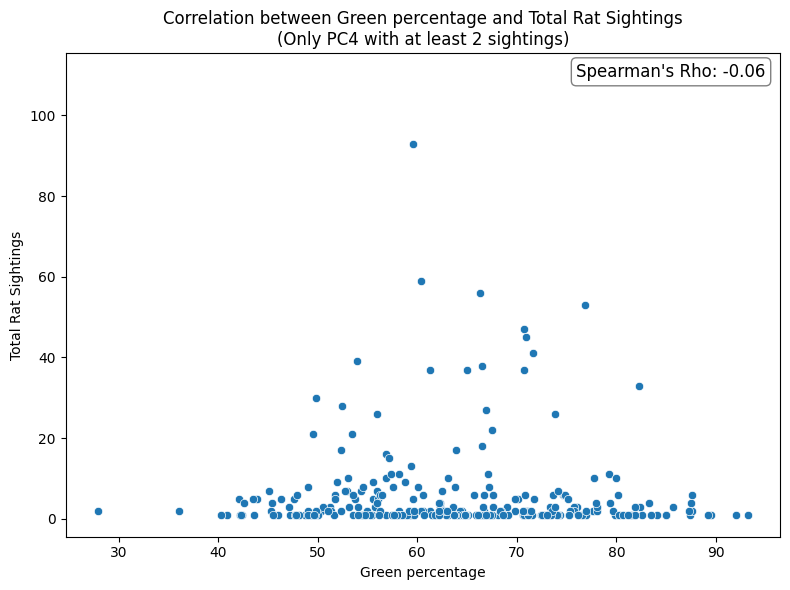

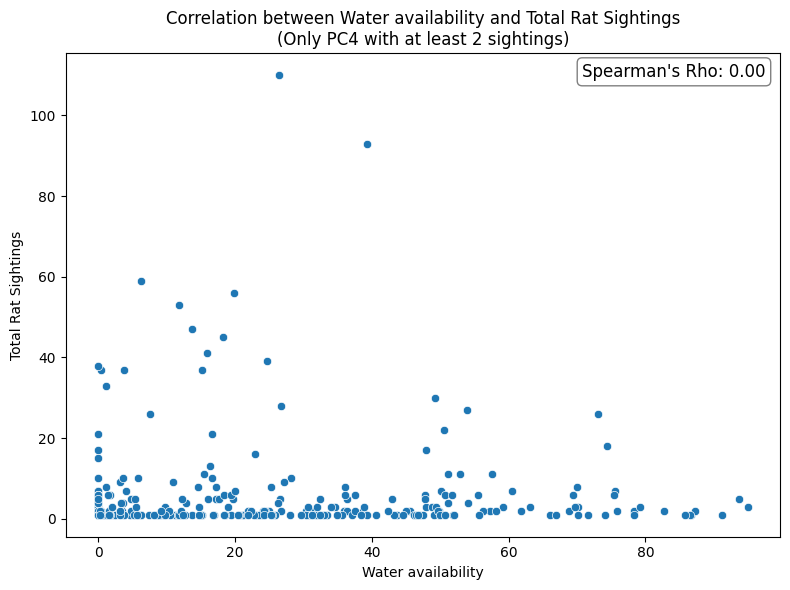

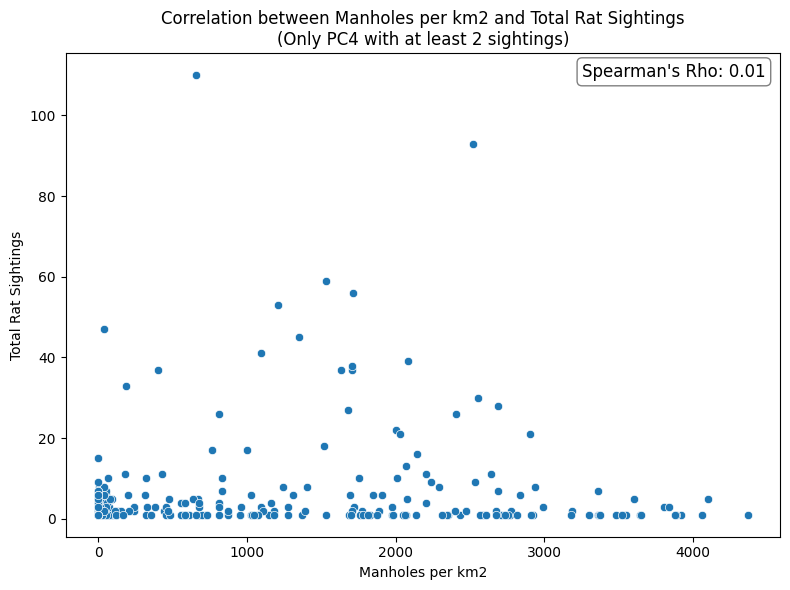

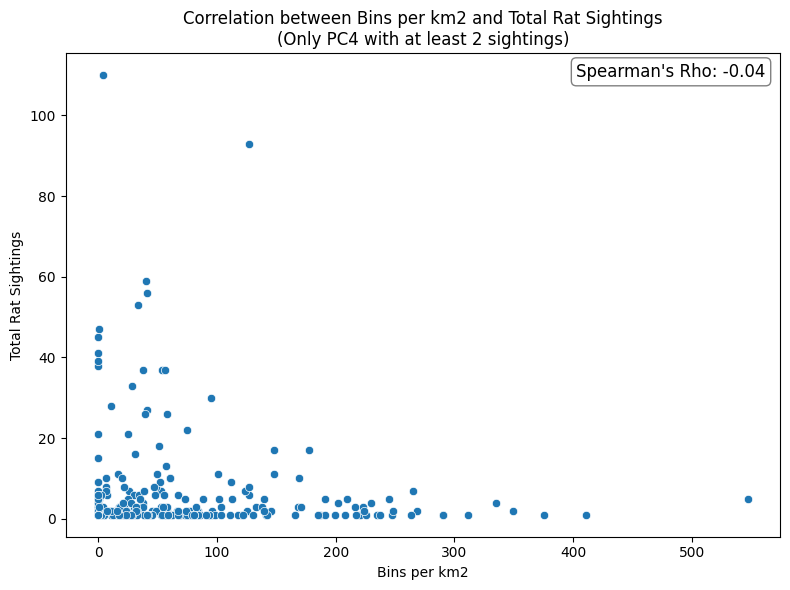

In [67]:
correlations = []

for col in cols_of_interest:
    if col == 'stedelijkheid':
        correlations.append(np.nan)
        continue

    merged = pc_rat_df.join(variables_df[[col, 'stedelijkheid']], how='inner')
    merged = merged[merged['stedelijkheid'] <= 2]
    merged = merged.dropna(subset=['TOTAAL', col])

    # Calculate Spearman's Rho
    corr = merged[[col, 'TOTAAL']].corr('spearman').iloc[0,1]
    correlations.append(corr)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged, x=col, y='TOTAAL')
    plt.title(f'Correlation between {col.replace('_', ' ').capitalize()} and Total Rat Sightings\n(Only PC4 with at least {min_sightings} sightings)')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Total Rat Sightings')

    # Annotate Spearman's rho in the top right
    plt.annotate(f"Spearman's Rho: {corr:.2f}", 
                xy=(0.98, 0.98), xycoords='axes fraction', 
                ha='right', va='top', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

    plt.tight_layout()
    plt.show()


correlation_df['urban_only'] = correlations

## Weather

In [5]:
# Merge month_rat_df and month_temp_df on the 'date' column
month_merged = pd.merge(month_rat_df, month_temp_df, on='date', how='inner', suffixes=('_rat', '_temp'))

# Display the merged DataFrame
month_merged.head()

year_rat  month_rat  EEN_OF_MEER  MEER_DAN_VIJF  TOTAAL       date  \
0      2019          6            2              1       3 2019-06-01   
1      2019          7            1              1       2 2019-07-01   
2      2019          8            4              2       6 2019-08-01   
3      2019          9           10             14      24 2019-09-01   
4      2019         10           15             14      29 2019-10-01   

   year_temp month_temp  mean_temperature  
0       2019          6          18.78278  
1       2019          7          19.15323  
2       2019          8          18.81398  
3       2019          9          14.61055  
4       2019         10          11.70538

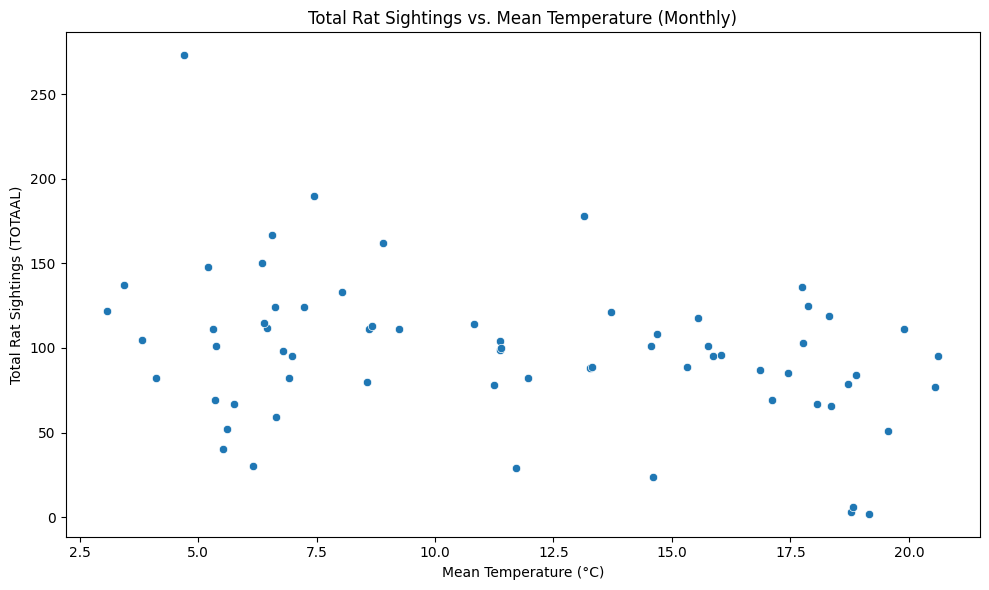

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=month_merged, x='mean_temperature', y='TOTAAL')
plt.title('Total Rat Sightings vs. Mean Temperature (Monthly)')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Total Rat Sightings (TOTAAL)')
plt.tight_layout()
plt.show()

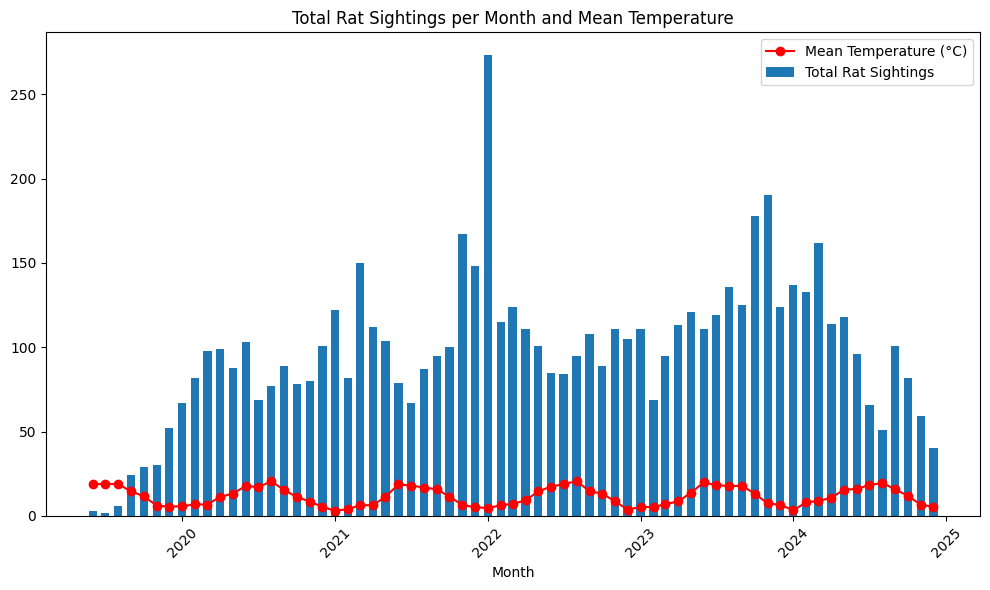

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(month_merged['date'], month_merged['TOTAAL'], width=20, label='Total Rat Sightings')
plt.plot(month_merged['date'], month_merged['mean_temperature'], color='red', marker='o', label='Mean Temperature (°C)')
plt.title('Total Rat Sightings per Month and Mean Temperature')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Amplitude (A): 19.47
Phase (phi): -2.30 radians
Offset (C): 109.20


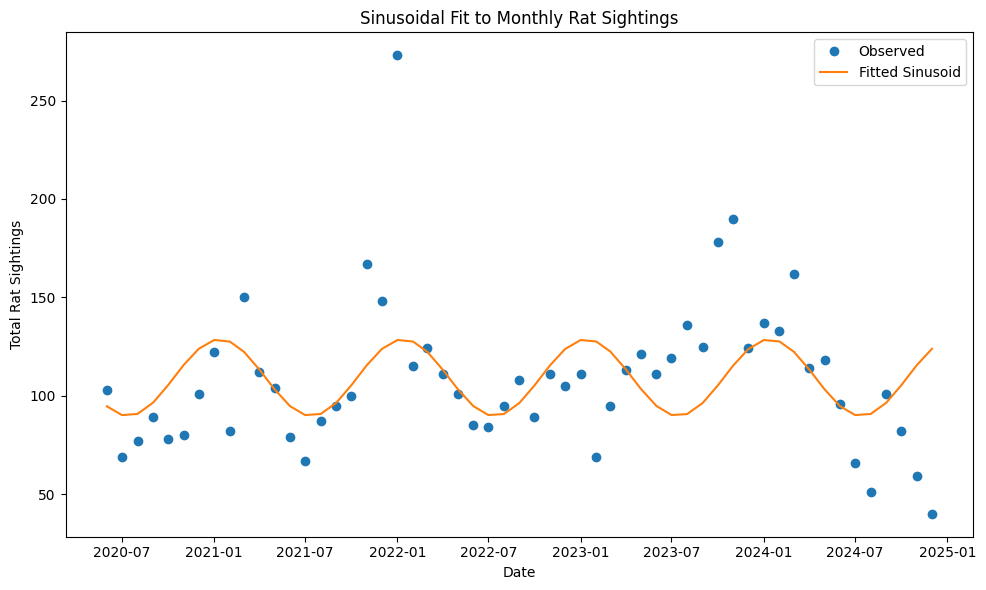

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter data: from June 2020 onwards
start_date = pd.Timestamp('2020-06-01')
df = month_rat_df[month_rat_df['date'] >= start_date].copy()

# Create time variable (t) as months since start
df['t'] = (df['date'] - df['date'].min()).dt.days / 30.44  # approx months

# Frequency: 1 cycle per year (12 months)
f = 1 / 12

# Feature engineering: sin and cos terms
df['sin'] = np.sin(2 * np.pi * f * df['t'])
df['cos'] = np.cos(2 * np.pi * f * df['t'])

# Fit linear regression: y = a*sin + b*cos + c
X = df[['sin', 'cos']]
y = df['TOTAAL']
reg = LinearRegression().fit(X, y)

# Extract parameters
a, b = reg.coef_
c = reg.intercept_
A = np.sqrt(a**2 + b**2)
phi = np.arctan2(b, a)

print(f"Amplitude (A): {A:.2f}")
print(f"Phase (phi): {phi:.2f} radians")
print(f"Offset (C): {c:.2f}")

# Predict and plot
df['y_pred'] = reg.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(df['date'], y, 'o', label='Observed')
plt.plot(df['date'], df['y_pred'], '-', label='Fitted Sinusoid')
plt.xlabel('Date')
plt.ylabel('Total Rat Sightings')
plt.title('Sinusoidal Fit to Monthly Rat Sightings')
plt.legend()
plt.tight_layout()
plt.show()
